In [1]:
import os
cwd = os.getcwd()
ParentDir=os.path.abspath(os.path.join(cwd, os.pardir))
FunctinDir=ParentDir + "\\Solution\\Functions"
FunctinDir

'D:\\Ali\\BootCamp\\Challenge\\Project_1\\Solution\\Functions'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import time

import sys
sys.path.insert(0,FunctinDir)
from Stock_Data import StockData

In [3]:
import os
cwd = os.getcwd()
cwd

'D:\\Ali\\BootCamp\\Challenge\\Project_1\\project1'

In [4]:
stock_raw = StockData("NFLX")

cases_raw = pd.read_csv('daily-covid-cases-deaths.csv',
                       encoding = 'utf-8')
cases_raw = cases_raw.rename(columns={"Day":"Date", 'Daily new confirmed cases of COVID-19': 'New Cases',\
                                      'Daily new confirmed deaths due to COVID-19':'New Deaths'})
cases_raw = cases_raw.loc[cases_raw["Entity"]=="World"]

[*********************100%***********************]  1 of 1 completed


In [5]:
cases_raw

,Entity,Code,Date,New Cases,New Deaths
222931,World,OWID_WRL,2020-01-22,0.0,0.0
222932,World,OWID_WRL,2020-01-23,100.0,1.0
222933,World,OWID_WRL,2020-01-24,287.0,8.0
222934,World,OWID_WRL,2020-01-25,493.0,16.0
222935,World,OWID_WRL,2020-01-26,683.0,14.0
...,...,...,...,...,...
223972,World,OWID_WRL,2022-11-28,425018.0,1155.0
223973,World,OWID_WRL,2022-11-29,724938.0,1501.0
223974,World,OWID_WRL,2022-11-30,525142.0,1609.0
223975,World,OWID_WRL,2022-12-01,726364.0,2728.0


In [6]:
stock_raw["Date"]=stock_raw["Date"].astype(str)
cutdown= lambda x: x.split()[0]
stock_raw["Date"]=stock_raw["Date"].apply(cutdown)
stock_raw["Date"]=stock_raw["Date"].astype(object)

In [7]:
stock_raw.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [8]:
stock_raw

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,259.279999,269.750000,256.579987,267.660004,267.660004,11679500
1,2019-01-03,270.200012,275.790009,264.429993,271.200012,271.200012,14969600
2,2019-01-04,281.880005,297.799988,278.540009,297.570007,297.570007,19330100
3,2019-01-07,302.100006,316.799988,301.649994,315.339996,315.339996,18620100
4,2019-01-08,319.980011,320.589996,308.010010,320.269989,320.269989,15359200
...,...,...,...,...,...,...,...
989,2022-12-05,316.459991,322.769989,310.920013,312.589996,312.589996,8423000
990,2022-12-06,311.000000,313.220001,303.130005,305.559998,305.559998,7195400
991,2022-12-07,306.500000,309.609985,302.100006,308.420013,308.420013,7821600
992,2022-12-08,309.109985,312.380005,304.809998,310.260010,310.260010,7205300


In [138]:
# SMA (Simple Moving Average) Indicator
# Help
    # df = DataFrame
    # SMA(df, firstperiod=7, secondperiod=14, Column='Close')
def SMA(df, period_1=7, period_2=14, Column='Close'):
    import numpy as np
    import matplotlib.pyplot as plt
    length=len(df['Date'])
    
    # adding SMA indicator
    df['SMA '+str(period_1)]= df[Column].rolling(window=period_1).mean()
    df['SMA '+str(period_2)]= df[Column].rolling(window=period_2).mean()

    # Buy and Sell Signal Define
    df['Signal']=np.where(df['SMA '+str(period_1)]>df['SMA '+str(period_2)], 1, 0)
    df['Position']=df['Signal'].diff()

    df['Buy']=np.where(df['Position']== 1, df['Close'], np.NAN)
    df['Sell']=np.where(df['Position']== -1, df['Close'], np.NAN)

    plt.figure(figsize=(20,10))
    # If plt.figure does not change the size, try placing it before plt.plot!

    plt.plot(df['Date'], df['Close'], color = 'k', alpha=0.5, label='Close Price')
    plt.plot(df['Date'], df['SMA '+str(period_1)], color = 'r', alpha=0.5,\
             label='SMA '+str(period_1))
    plt.plot(df['Date'], df['SMA '+str(period_2)], color = 'b', alpha=0.5,\
             label='SMA '+str(period_2))
    sizes = [200]
    plt.scatter(df['Date'], df['Buy'], sizes, alpha=1, marker='^', color= 'limegreen')
    plt.scatter(df['Date'], df['Sell'], sizes, alpha=1, marker='v', color= 'red')
    plt.xticks(np.arange(0, length, 50), rotation = 45, rotation_mode = 'anchor',\
               ha = 'right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlim(0, length)
    plt.legend(fontsize=16)
    plt.xlabel('Date (yyyy-mm-dd)', fontsize=18)
    plt.ylabel('Closing Price in ($)', fontsize=18)
    plt.title("Netflix Closing Prices from "+ stock_cases['Date'][0] +" to "+\
              stock_cases['Date'][length - 1] , fontsize=20)
    plt.savefig(ParentDir + "\\" + "SMA" + "_" + str(period_1) + "_" + str(period_2) + ".png",\
               dpi=300, bbox_inches='tight')
    plt.show()
    return

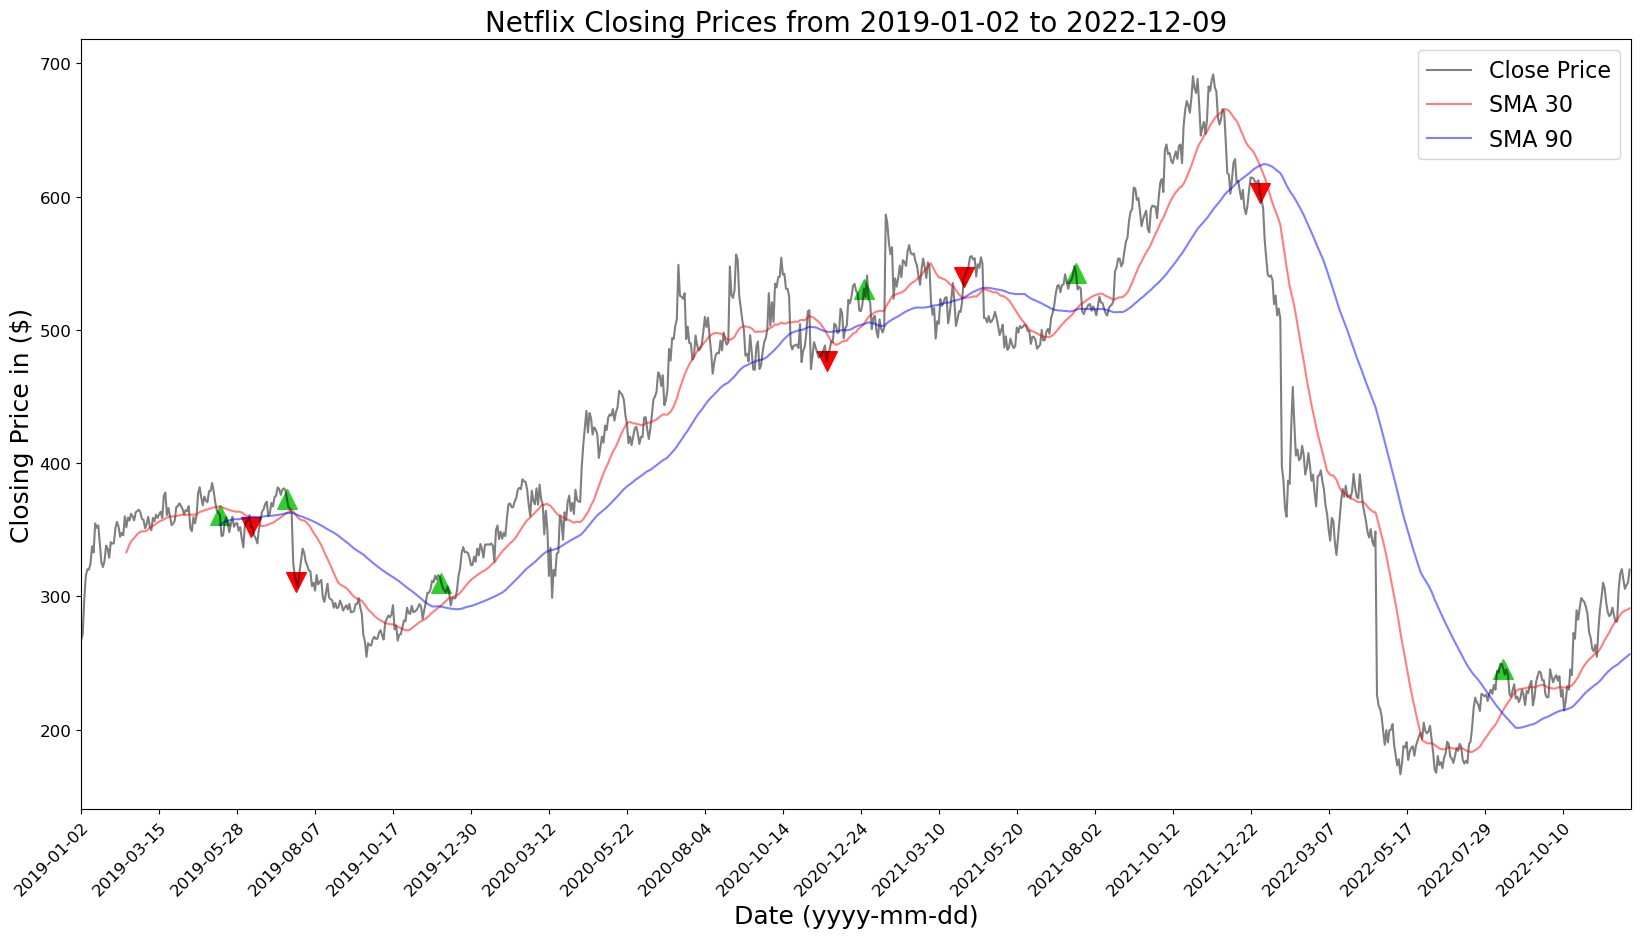

In [139]:
SMA(stock_raw, 30, 90, Column='Close')

In [10]:
stock_raw

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,259.279999,269.750000,256.579987,267.660004,267.660004,11679500
1,2019-01-03,270.200012,275.790009,264.429993,271.200012,271.200012,14969600
2,2019-01-04,281.880005,297.799988,278.540009,297.570007,297.570007,19330100
3,2019-01-07,302.100006,316.799988,301.649994,315.339996,315.339996,18620100
4,2019-01-08,319.980011,320.589996,308.010010,320.269989,320.269989,15359200
...,...,...,...,...,...,...,...
989,2022-12-05,316.459991,322.769989,310.920013,312.589996,312.589996,8423000
990,2022-12-06,311.000000,313.220001,303.130005,305.559998,305.559998,7195400
991,2022-12-07,306.500000,309.609985,302.100006,308.420013,308.420013,7821600
992,2022-12-08,309.109985,312.380005,304.809998,310.260010,310.260010,7205300


In [11]:
stock_raw.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [12]:
cases_raw.dtypes

Entity         object
Code           object
Date           object
New Cases     float64
New Deaths    float64
dtype: object

In [13]:
stock_raw["Date"]=stock_raw["Date"].astype(object)

In [14]:
stock_cases = pd.merge(stock_raw, cases_raw, how="left",  on=["Date"])
stock_cases               

,Date,Open,High,Low,Close,Adj Close,Volume,Entity,Code,New Cases,New Deaths
0,2019-01-02,259.279999,269.750000,256.579987,267.660004,267.660004,11679500,NaN,NaN,NaN,NaN
1,2019-01-03,270.200012,275.790009,264.429993,271.200012,271.200012,14969600,NaN,NaN,NaN,NaN
2,2019-01-04,281.880005,297.799988,278.540009,297.570007,297.570007,19330100,NaN,NaN,NaN,NaN
3,2019-01-07,302.100006,316.799988,301.649994,315.339996,315.339996,18620100,NaN,NaN,NaN,NaN
4,2019-01-08,319.980011,320.589996,308.010010,320.269989,320.269989,15359200,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
989,2022-12-05,316.459991,322.769989,310.920013,312.589996,312.589996,8423000,NaN,NaN,NaN,NaN
990,2022-12-06,311.000000,313.220001,303.130005,305.559998,305.559998,7195400,NaN,NaN,NaN,NaN
991,2022-12-07,306.500000,309.609985,302.100006,308.420013,308.420013,7821600,NaN,NaN,NaN,NaN
992,2022-12-08,309.109985,312.380005,304.809998,310.260010,310.260010,7205300,NaN,NaN,NaN,NaN


In [15]:
stock_cases.insert(10,'Case Fatality','')
stock_cases

,Date,Open,High,Low,Close,Adj Close,Volume,Entity,Code,New Cases,Case Fatality,New Deaths
0,2019-01-02,259.279999,269.750000,256.579987,267.660004,267.660004,11679500,NaN,NaN,NaN,,NaN
1,2019-01-03,270.200012,275.790009,264.429993,271.200012,271.200012,14969600,NaN,NaN,NaN,,NaN
2,2019-01-04,281.880005,297.799988,278.540009,297.570007,297.570007,19330100,NaN,NaN,NaN,,NaN
3,2019-01-07,302.100006,316.799988,301.649994,315.339996,315.339996,18620100,NaN,NaN,NaN,,NaN
4,2019-01-08,319.980011,320.589996,308.010010,320.269989,320.269989,15359200,NaN,NaN,NaN,,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
989,2022-12-05,316.459991,322.769989,310.920013,312.589996,312.589996,8423000,NaN,NaN,NaN,,NaN
990,2022-12-06,311.000000,313.220001,303.130005,305.559998,305.559998,7195400,NaN,NaN,NaN,,NaN
991,2022-12-07,306.500000,309.609985,302.100006,308.420013,308.420013,7821600,NaN,NaN,NaN,,NaN
992,2022-12-08,309.109985,312.380005,304.809998,310.260010,310.260010,7205300,NaN,NaN,NaN,,NaN


In [16]:
stock_cases['Case Fatality'] = stock_cases.apply(\
    lambda x: round((x['New Deaths']/x['New Cases'])*100,2) if x['New Cases'] != 0 else 0, axis=1)
stock_cases

,Date,Open,High,Low,Close,Adj Close,Volume,Entity,Code,New Cases,Case Fatality,New Deaths
0,2019-01-02,259.279999,269.750000,256.579987,267.660004,267.660004,11679500,NaN,NaN,NaN,NaN,NaN
1,2019-01-03,270.200012,275.790009,264.429993,271.200012,271.200012,14969600,NaN,NaN,NaN,NaN,NaN
2,2019-01-04,281.880005,297.799988,278.540009,297.570007,297.570007,19330100,NaN,NaN,NaN,NaN,NaN
3,2019-01-07,302.100006,316.799988,301.649994,315.339996,315.339996,18620100,NaN,NaN,NaN,NaN,NaN
4,2019-01-08,319.980011,320.589996,308.010010,320.269989,320.269989,15359200,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
989,2022-12-05,316.459991,322.769989,310.920013,312.589996,312.589996,8423000,NaN,NaN,NaN,NaN,NaN
990,2022-12-06,311.000000,313.220001,303.130005,305.559998,305.559998,7195400,NaN,NaN,NaN,NaN,NaN
991,2022-12-07,306.500000,309.609985,302.100006,308.420013,308.420013,7821600,NaN,NaN,NaN,NaN,NaN
992,2022-12-08,309.109985,312.380005,304.809998,310.260010,310.260010,7205300,NaN,NaN,NaN,NaN,NaN


In [17]:
stock_cases=stock_cases.fillna(0)
stock_cases

,Date,Open,High,Low,Close,Adj Close,Volume,Entity,Code,New Cases,Case Fatality,New Deaths
0,2019-01-02,259.279999,269.750000,256.579987,267.660004,267.660004,11679500,0,0,0.0,0.0,0.0
1,2019-01-03,270.200012,275.790009,264.429993,271.200012,271.200012,14969600,0,0,0.0,0.0,0.0
2,2019-01-04,281.880005,297.799988,278.540009,297.570007,297.570007,19330100,0,0,0.0,0.0,0.0
3,2019-01-07,302.100006,316.799988,301.649994,315.339996,315.339996,18620100,0,0,0.0,0.0,0.0
4,2019-01-08,319.980011,320.589996,308.010010,320.269989,320.269989,15359200,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
989,2022-12-05,316.459991,322.769989,310.920013,312.589996,312.589996,8423000,0,0,0.0,0.0,0.0
990,2022-12-06,311.000000,313.220001,303.130005,305.559998,305.559998,7195400,0,0,0.0,0.0,0.0
991,2022-12-07,306.500000,309.609985,302.100006,308.420013,308.420013,7821600,0,0,0.0,0.0,0.0
992,2022-12-08,309.109985,312.380005,304.809998,310.260010,310.260010,7205300,0,0,0.0,0.0,0.0


In [18]:
stock_cases.count()

Date             994
Open             994
High             994
Low              994
Close            994
Adj Close        994
Volume           994
Entity           994
Code             994
New Cases        994
Case Fatality    994
New Deaths       994
dtype: int64

In [19]:
length=len(stock_cases.index)
length

994

In [20]:
stock_cases

,Date,Open,High,Low,Close,Adj Close,Volume,Entity,Code,New Cases,Case Fatality,New Deaths
0,2019-01-02,259.279999,269.750000,256.579987,267.660004,267.660004,11679500,0,0,0.0,0.0,0.0
1,2019-01-03,270.200012,275.790009,264.429993,271.200012,271.200012,14969600,0,0,0.0,0.0,0.0
2,2019-01-04,281.880005,297.799988,278.540009,297.570007,297.570007,19330100,0,0,0.0,0.0,0.0
3,2019-01-07,302.100006,316.799988,301.649994,315.339996,315.339996,18620100,0,0,0.0,0.0,0.0
4,2019-01-08,319.980011,320.589996,308.010010,320.269989,320.269989,15359200,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
989,2022-12-05,316.459991,322.769989,310.920013,312.589996,312.589996,8423000,0,0,0.0,0.0,0.0
990,2022-12-06,311.000000,313.220001,303.130005,305.559998,305.559998,7195400,0,0,0.0,0.0,0.0
991,2022-12-07,306.500000,309.609985,302.100006,308.420013,308.420013,7821600,0,0,0.0,0.0,0.0
992,2022-12-08,309.109985,312.380005,304.809998,310.260010,310.260010,7205300,0,0,0.0,0.0,0.0


In [21]:
Firstrow = stock_cases.iloc[[0,]]['Date']
LastRow  = stock_cases.iloc[[-1,]]['Date']

In [22]:
LastRow.values

array(['2022-12-09'], dtype=object)

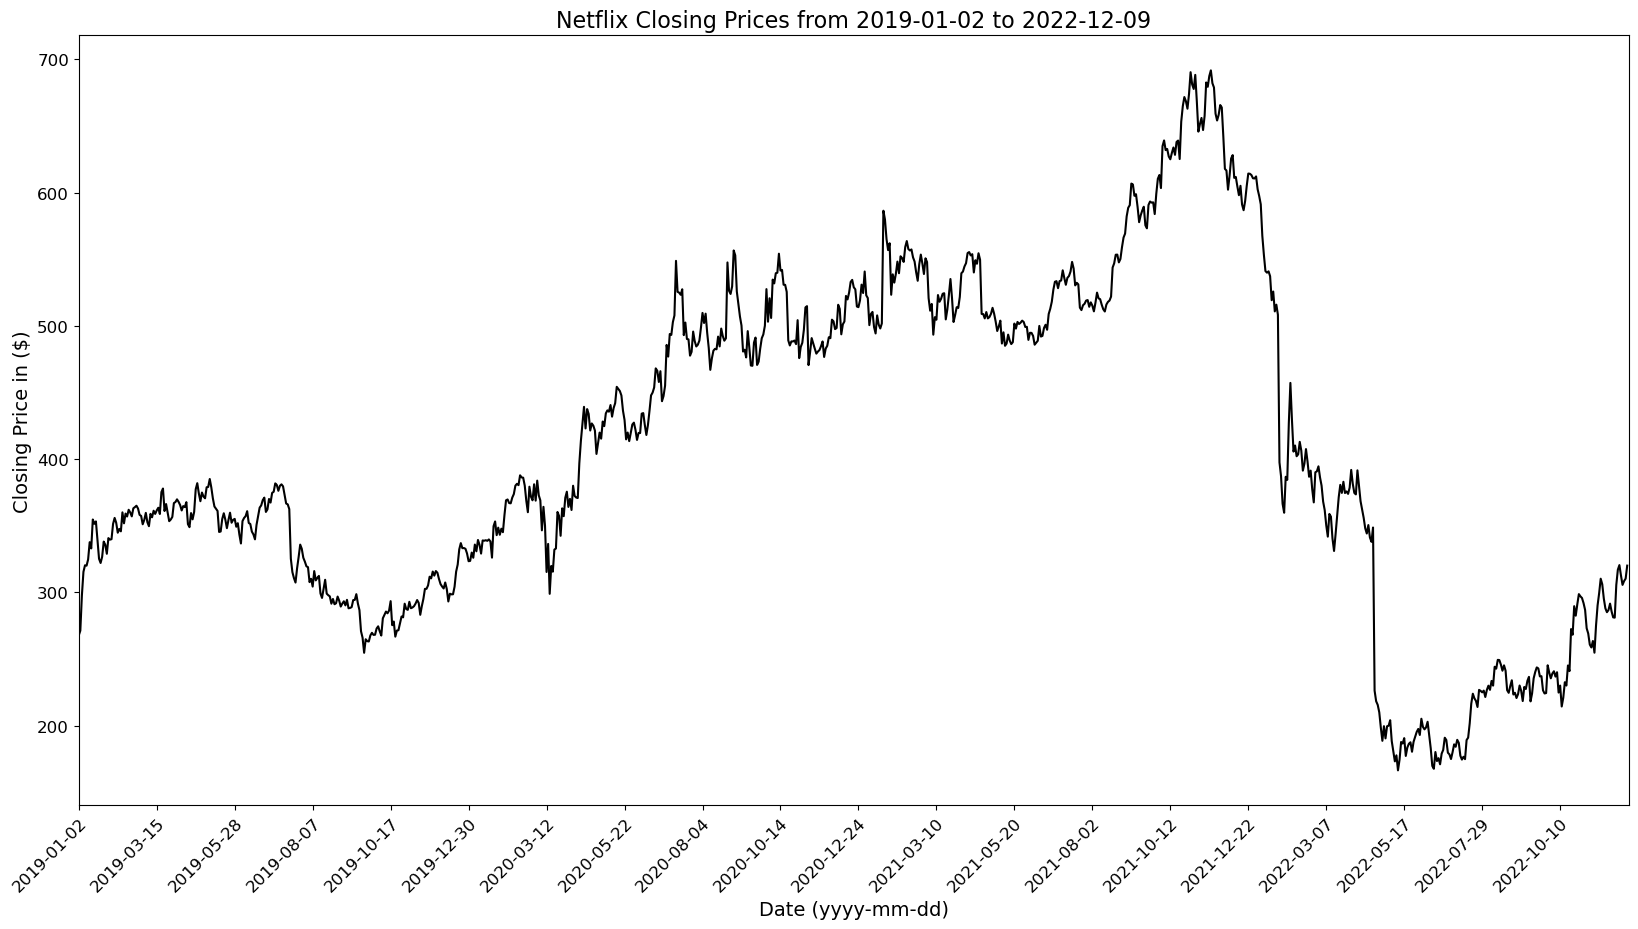

In [23]:
# Main Stock trend:
plt.figure(figsize=(20,10))
# If plt.figure does not change the size, try placing it before plt.plot!
plt.plot(stock_cases['Date'], stock_cases["Close"], color = 'k', label='Close Price')
plt.xticks(np.arange(0, length, 50), rotation = 45, rotation_mode = 'anchor', ha = 'right', fontsize='12')
plt.yticks(fontsize='12')
plt.xlim(0, length)
plt.xlabel('Date (yyyy-mm-dd)', fontsize='14')
plt.ylabel('Closing Price in ($)', fontsize='14')
plt.title("Netflix Closing Prices from "+ stock_cases['Date'][0] +" to "+ stock_cases['Date'][length - 1] , fontsize='16')
# Saving Plot Code --------------------------
plt.show()

In [24]:
#SMA (Simple Moving Average) Indicator
def SMA(data, period=7, Column='Close'):
    return data[Column].rolling(window=period).mean()

In [25]:
# adding Indicator
# stock_cases['SMA7']=SMA(stock_cases,7)
stock_cases['SMA30']=SMA(stock_cases,30)
stock_cases['SMA90']=SMA(stock_cases,90)
# stock_cases['SMA180']=SMA(stock_cases,180)
# stock_cases['SMA365']=SMA(stock_cases,365)
stock_cases

,Date,Open,High,Low,Close,Adj Close,Volume,Entity,Code,New Cases,Case Fatality,New Deaths,SMA30,SMA90
0,2019-01-02,259.279999,269.750000,256.579987,267.660004,267.660004,11679500,0,0,0.0,0.0,0.0,NaN,NaN
1,2019-01-03,270.200012,275.790009,264.429993,271.200012,271.200012,14969600,0,0,0.0,0.0,0.0,NaN,NaN
2,2019-01-04,281.880005,297.799988,278.540009,297.570007,297.570007,19330100,0,0,0.0,0.0,0.0,NaN,NaN
3,2019-01-07,302.100006,316.799988,301.649994,315.339996,315.339996,18620100,0,0,0.0,0.0,0.0,NaN,NaN
4,2019-01-08,319.980011,320.589996,308.010010,320.269989,320.269989,15359200,0,0,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,2022-12-05,316.459991,322.769989,310.920013,312.589996,312.589996,8423000,0,0,0.0,0.0,0.0,288.439668,252.634334
990,2022-12-06,311.000000,313.220001,303.130005,305.559998,305.559998,7195400,0,0,0.0,0.0,0.0,289.210001,253.530556
991,2022-12-07,306.500000,309.609985,302.100006,308.420013,308.420013,7821600,0,0,0.0,0.0,0.0,289.790001,254.444001
992,2022-12-08,309.109985,312.380005,304.809998,310.260010,310.260010,7205300,0,0,0.0,0.0,0.0,290.178002,255.431112


In [26]:
# Buy and Sell Signal Define
stock_cases['Signal']=np.where(stock_cases['SMA30']>stock_cases['SMA90'], 1, 0)
stock_cases['Position']=stock_cases['Signal'].diff()

stock_cases['Buy']=np.where(stock_cases['Position']== 1, stock_cases['Close'], np.NAN)
stock_cases['Sell']=np.where(stock_cases['Position']== -1, stock_cases['Close'], np.NAN)
stock_cases

,Date,Open,High,Low,Close,Adj Close,Volume,Entity,Code,New Cases,Case Fatality,New Deaths,SMA30,SMA90,Signal,Position,Buy,Sell
0,2019-01-02,259.279999,269.750000,256.579987,267.660004,267.660004,11679500,0,0,0.0,0.0,0.0,NaN,NaN,0,NaN,NaN,NaN
1,2019-01-03,270.200012,275.790009,264.429993,271.200012,271.200012,14969600,0,0,0.0,0.0,0.0,NaN,NaN,0,0.0,NaN,NaN
2,2019-01-04,281.880005,297.799988,278.540009,297.570007,297.570007,19330100,0,0,0.0,0.0,0.0,NaN,NaN,0,0.0,NaN,NaN
3,2019-01-07,302.100006,316.799988,301.649994,315.339996,315.339996,18620100,0,0,0.0,0.0,0.0,NaN,NaN,0,0.0,NaN,NaN
4,2019-01-08,319.980011,320.589996,308.010010,320.269989,320.269989,15359200,0,0,0.0,0.0,0.0,NaN,NaN,0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,2022-12-05,316.459991,322.769989,310.920013,312.589996,312.589996,8423000,0,0,0.0,0.0,0.0,288.439668,252.634334,1,0.0,NaN,NaN
990,2022-12-06,311.000000,313.220001,303.130005,305.559998,305.559998,7195400,0,0,0.0,0.0,0.0,289.210001,253.530556,1,0.0,NaN,NaN
991,2022-12-07,306.500000,309.609985,302.100006,308.420013,308.420013,7821600,0,0,0.0,0.0,0.0,289.790001,254.444001,1,0.0,NaN,NaN
992,2022-12-08,309.109985,312.380005,304.809998,310.260010,310.260010,7205300,0,0,0.0,0.0,0.0,290.178002,255.431112,1,0.0,NaN,NaN


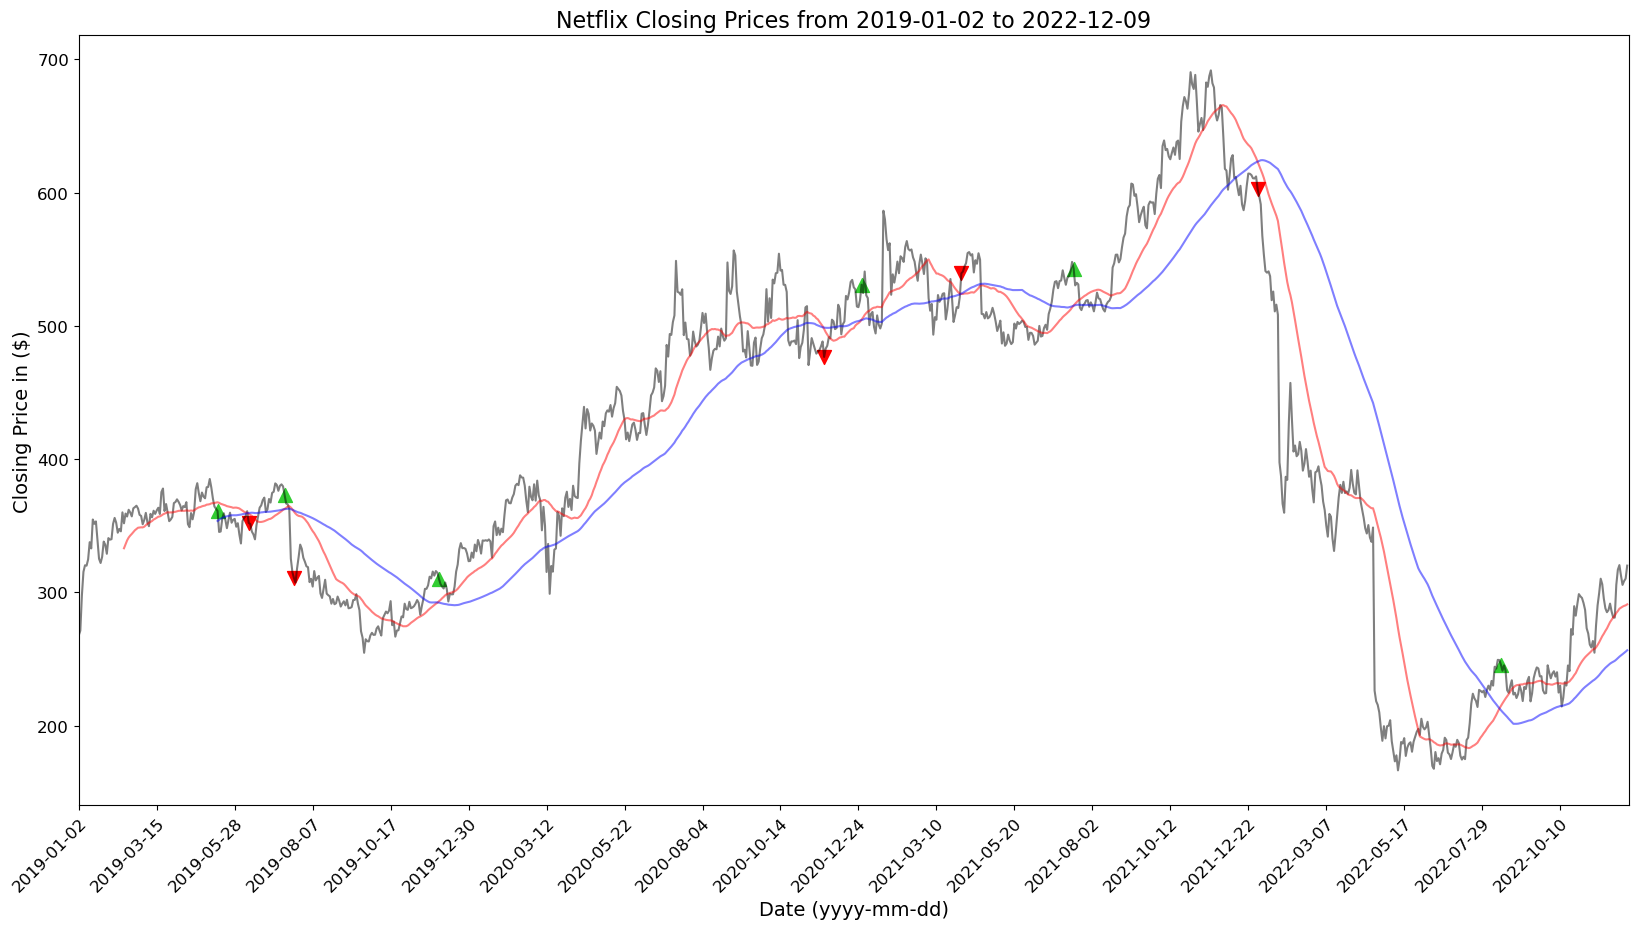

In [27]:
plt.figure(figsize=(20,10))
# If plt.figure does not change the size, try placing it before plt.plot!

plt.plot(stock_cases['Date'], stock_cases['Close'], color = 'k', alpha=0.5, label='Close Price')
# plt.plot(final_stock_cases['Date'], final_stock_cases['SMA7'], color = 'y', alpha=0.8, label='SMA Week')
plt.plot(stock_cases['Date'], stock_cases['SMA30'], color = 'r', alpha=0.5, label='SMA Month')
plt.plot(stock_cases['Date'], stock_cases['SMA90'], color = 'b', alpha=0.5, label='SMA Seasen')
# plt.plot(final_stock_cases['Date'], final_stock_cases['SMA180'], color = 'hotpink', alpha=0.5, label='SMA 2 Seasen')
# plt.plot(final_stock_cases['Date'], final_stock_cases['SMA365'], color = 'peru', alpha=0.5, label='SMA year')
sizes = [100]
plt.scatter(stock_cases['Date'],stock_cases['Buy'], sizes, alpha=1, marker='^', color= 'limegreen')
plt.scatter(stock_cases['Date'],stock_cases['Sell'], sizes, alpha=1, marker='v', color= 'red')
plt.xticks(np.arange(0, length, 50), rotation = 45, rotation_mode = 'anchor', ha = 'right', fontsize='12')
plt.yticks(fontsize='12')
plt.xlim(0, length)
plt.xlabel('Date (yyyy-mm-dd)', fontsize='14')
plt.ylabel('Closing Price in ($)', fontsize='14')
plt.title("Netflix Closing Prices from "+ stock_cases['Date'][0] +" to "+ stock_cases['Date'][length - 1] , fontsize='16')
plt.show()

In [28]:
stock_cases=stock_cases.fillna(0)
stock_cases

,Date,Open,High,Low,Close,Adj Close,Volume,Entity,Code,New Cases,Case Fatality,New Deaths,SMA30,SMA90,Signal,Position,Buy,Sell
0,2019-01-02,259.279999,269.750000,256.579987,267.660004,267.660004,11679500,0,0,0.0,0.0,0.0,0.000000,0.000000,0,0.0,0.0,0.0
1,2019-01-03,270.200012,275.790009,264.429993,271.200012,271.200012,14969600,0,0,0.0,0.0,0.0,0.000000,0.000000,0,0.0,0.0,0.0
2,2019-01-04,281.880005,297.799988,278.540009,297.570007,297.570007,19330100,0,0,0.0,0.0,0.0,0.000000,0.000000,0,0.0,0.0,0.0
3,2019-01-07,302.100006,316.799988,301.649994,315.339996,315.339996,18620100,0,0,0.0,0.0,0.0,0.000000,0.000000,0,0.0,0.0,0.0
4,2019-01-08,319.980011,320.589996,308.010010,320.269989,320.269989,15359200,0,0,0.0,0.0,0.0,0.000000,0.000000,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,2022-12-05,316.459991,322.769989,310.920013,312.589996,312.589996,8423000,0,0,0.0,0.0,0.0,288.439668,252.634334,1,0.0,0.0,0.0
990,2022-12-06,311.000000,313.220001,303.130005,305.559998,305.559998,7195400,0,0,0.0,0.0,0.0,289.210001,253.530556,1,0.0,0.0,0.0
991,2022-12-07,306.500000,309.609985,302.100006,308.420013,308.420013,7821600,0,0,0.0,0.0,0.0,289.790001,254.444001,1,0.0,0.0,0.0
992,2022-12-08,309.109985,312.380005,304.809998,310.260010,310.260010,7205300,0,0,0.0,0.0,0.0,290.178002,255.431112,1,0.0,0.0,0.0


In [29]:
#SMA Indicator output for month/season
stock_cases_buy_sell= stock_cases[(stock_cases["Buy"] != 0) | \
                                              (stock_cases["Sell"] != 0) ][['Date','Buy','Sell']]
stock_cases_buy_sell

,Date,Buy,Sell
89,2019-05-10,361.040009,0.000000
109,2019-06-10,0.000000,352.010010
132,2019-07-12,373.250000,0.000000
138,2019-07-22,0.000000,310.619995
231,2019-12-02,309.989990,0.000000
478,2020-11-23,0.000000,476.619995
502,2020-12-29,530.869995,0.000000
566,2021-04-01,0.000000,539.419983
638,2021-07-15,542.950012,0.000000
756,2021-12-31,0.000000,602.440002


The r-value is 0.74


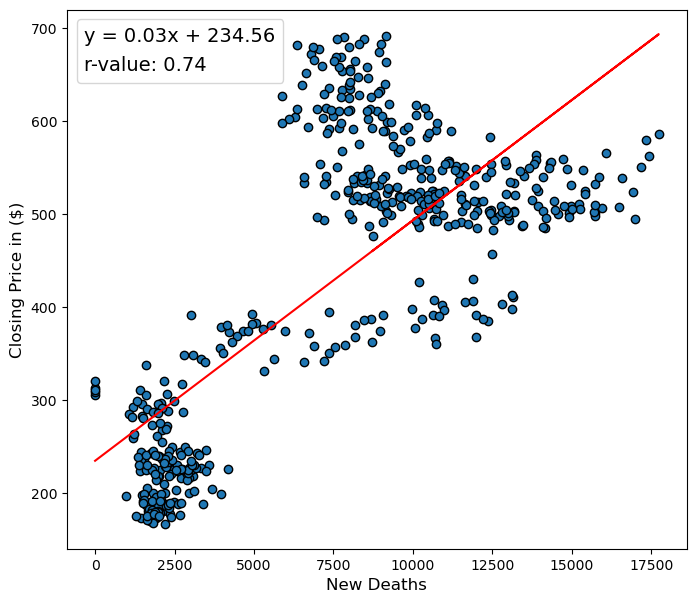

In [143]:
x_values = stock_cases.loc[(stock_cases['Date'] >= "2019-12-02") &\
                           (stock_cases['Date'] >= "2020-11-23")]['New Deaths'] 
y_values = stock_cases.loc[(stock_cases['Date'] >= "2019-12-02") &\
                           (stock_cases['Date'] >= "2020-11-23")]['Close']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r2="r-value: " + str(round(rvalue,2))
plt.scatter(x_values,y_values, marker='o', edgecolor='black', facecolor='tab:blue')
plt.plot(x_values,regress_values,"r-")
handles, labels = plt.gca().get_legend_handles_labels()
patch_1 = mpatches.Patch(color='none', label=line_eq)
patch_2 = mpatches.Patch(color='none', label=r2)
handles.extend([patch_1, patch_2])
plt.legend(fontsize=14, loc='best',handlelength=0, handletextpad=0, fancybox=True, handles=handles)
        
plt.xlabel('New Deaths', fontsize=12)
plt.ylabel('Closing Price in ($)', fontsize=12)
        

plt.gcf().set_size_inches(8, 7)
print(f"The r-value is {round(rvalue,2)}")
plt.show()


The r-value is 0.75


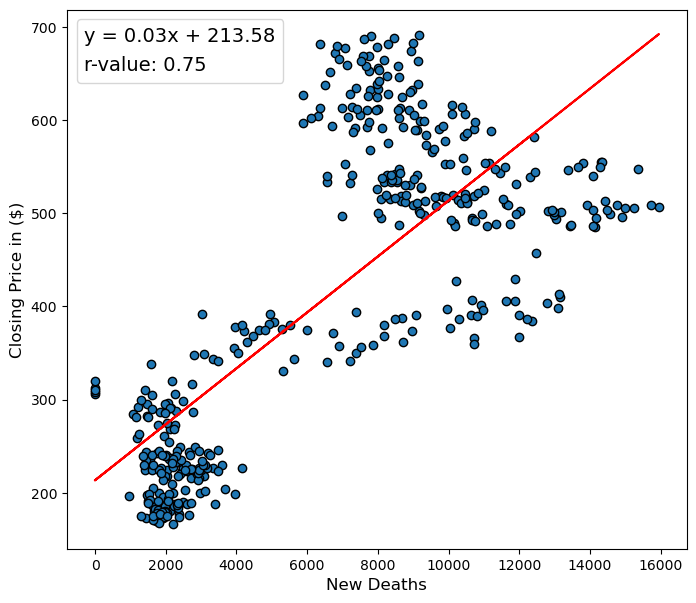

In [144]:
x_values = stock_cases.loc[(stock_cases['Date'] >= "2020-12-29") & (stock_cases['Date'] >=\
                                                                    "2021-04-01")]['New Deaths'] 
y_values = stock_cases.loc[(stock_cases['Date'] >= "2020-12-29") & (stock_cases['Date'] >=\
                                                                    "2021-04-01")]['Close']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r2="r-value: " + str(round(rvalue,2))
plt.scatter(x_values, y_values, marker='o', edgecolor='black', facecolor='tab:blue')
plt.plot(x_values,regress_values,"r-")
handles, labels = plt.gca().get_legend_handles_labels()
patch_1 = mpatches.Patch(color='none', label=line_eq)
patch_2 = mpatches.Patch(color='none', label=r2)
handles.extend([patch_1, patch_2])
plt.legend(fontsize=14, loc='best',handlelength=0, handletextpad=0, fancybox=True,
           handles=handles)
        
plt.xlabel('New Deaths', fontsize=12)
plt.ylabel('Closing Price in ($)', fontsize=12)
        

plt.gcf().set_size_inches(8, 7)
print(f"The r-value is {round(rvalue,2)}")
plt.show()

The r-value is 0.73


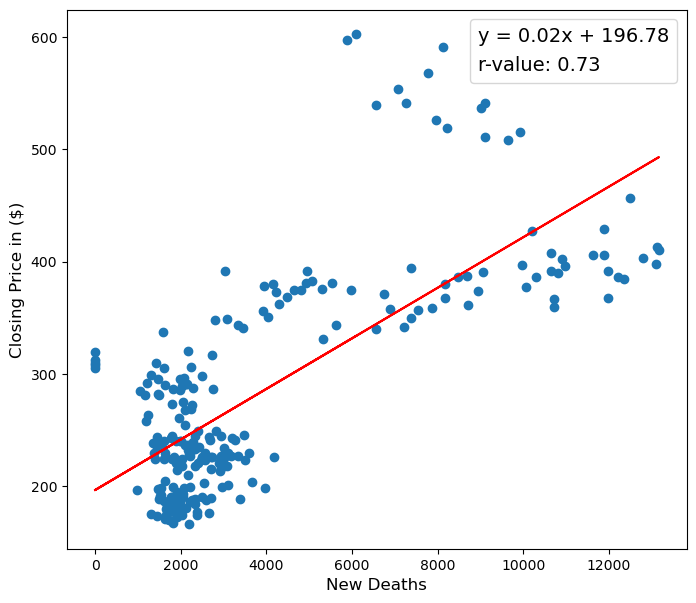

In [32]:
x_values = stock_cases.loc[(stock_cases['Date'] >= "2021-07-15") &\
                           (stock_cases['Date'] >= "2021-12-31")]['New Deaths'] 
y_values = stock_cases.loc[(stock_cases['Date'] >= "2021-07-15") &\
                           (stock_cases['Date'] >= "2021-12-31")]['Close']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r2="r-value: " + str(round(rvalue,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
handles, labels = plt.gca().get_legend_handles_labels()
patch_1 = mpatches.Patch(color='none', label=line_eq)
patch_2 = mpatches.Patch(color='none', label=r2)
handles.extend([patch_1, patch_2])
plt.legend(fontsize=14, loc='best',handlelength=0, handletextpad=0, fancybox=True, handles=handles)
        
plt.xlabel('New Deaths', fontsize=12)
plt.ylabel('Closing Price in ($)', fontsize=12)
        

plt.gcf().set_size_inches(8, 7)
print(f"The r-value is {round(rvalue,2)}")
plt.show()

The r-value is -0.29


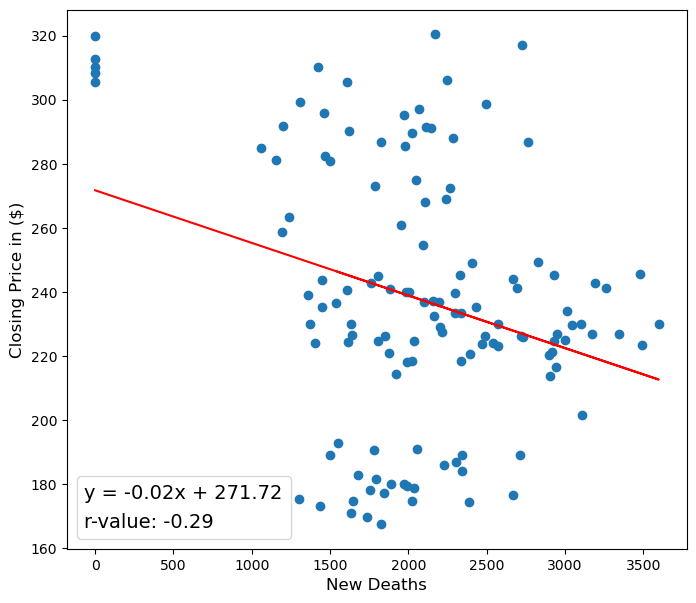

In [33]:
x_values = stock_cases.loc[(stock_cases['Date'] >= "2022-01-01") & (stock_cases['Date'] >= "2022-06-09")]['New Deaths'] 
y_values = stock_cases.loc[(stock_cases['Date'] >= "2022-01-01") & (stock_cases['Date'] >= "2022-06-09")]['Close']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r2="r-value: " + str(round(rvalue,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
handles, labels = plt.gca().get_legend_handles_labels()
patch_1 = mpatches.Patch(color='none', label=line_eq)
patch_2 = mpatches.Patch(color='none', label=r2)
handles.extend([patch_1, patch_2])
plt.legend(fontsize=14, loc='best',handlelength=0, handletextpad=0, fancybox=True, handles=handles)
        
plt.xlabel('New Deaths', fontsize=12)
plt.ylabel('Closing Price in ($)', fontsize=12)
        

plt.gcf().set_size_inches(8, 7)
print(f"The r-value is {round(rvalue,2)}")
plt.show()

In [34]:
# IchimokuCloud Indicator
def IchimokuCloud(df):
    high_9 = df['High'].rolling(window= 9).max()
    low_9 = df['Low'].rolling(window= 9).min()
    df['tenkan_sen'] = (high_9 + low_9) /2

    high_26 = df['High'].rolling(window= 26).max()
    low_26 = df['Low'].rolling(window= 26).min()
    df['kijun_sen'] = (high_26 + low_26) /2

    last_index = df.iloc[-1:].index[0]
    last_date = df['Date']

    df['senkou_span_a'] = ((df['tenkan_sen'] + df['kijun_sen']) / 2).shift(26)

    high_52 = df['High'].rolling(window= 52).max()
    low_52 = df['Low'].rolling(window= 52).min()
    df['senkou_span_b'] = ((high_52 + low_52) /2).shift(26)

    df['chikou_span'] = df['Close'].shift(-22) 

    plt.figure(figsize=(20,10))
    plt.plot(df['Date'], df['Close'], color = 'k', alpha=0.5, label='Close Price')
    plt.plot(df['Date'], df['senkou_span_a'], color = 'limegreen', alpha=0.5, label='Senkou Span A')
    plt.plot(df['Date'], df['senkou_span_b'], color = 'orangered', alpha=0.5, label='Senkou Span B')
    plt.fill_between(df['Date'], df.senkou_span_a, df.senkou_span_b,where = df.senkou_span_a >=\
                    df.senkou_span_b, color = 'limegreen')
    plt.fill_between(df['Date'], df.senkou_span_a, df.senkou_span_b,where = df.senkou_span_a < \
                    df.senkou_span_b, color = 'orangered')
    plt.xticks(np.arange(0, length, 50), rotation = 45, rotation_mode = 'anchor', ha = 'right', fontsize='12')
    plt.yticks(fontsize='12')
    plt.xlim(0, length)
    plt.legend(fontsize='12')
    plt.xlabel('Date (yyyy-mm-dd)', fontsize='14')
    plt.ylabel('Closing Price in ($)', fontsize='14')
    plt.title('Netflix Closing Prices from 2019-01-22 to 2022-06-03', fontsize='16')
    plt.show()
    return

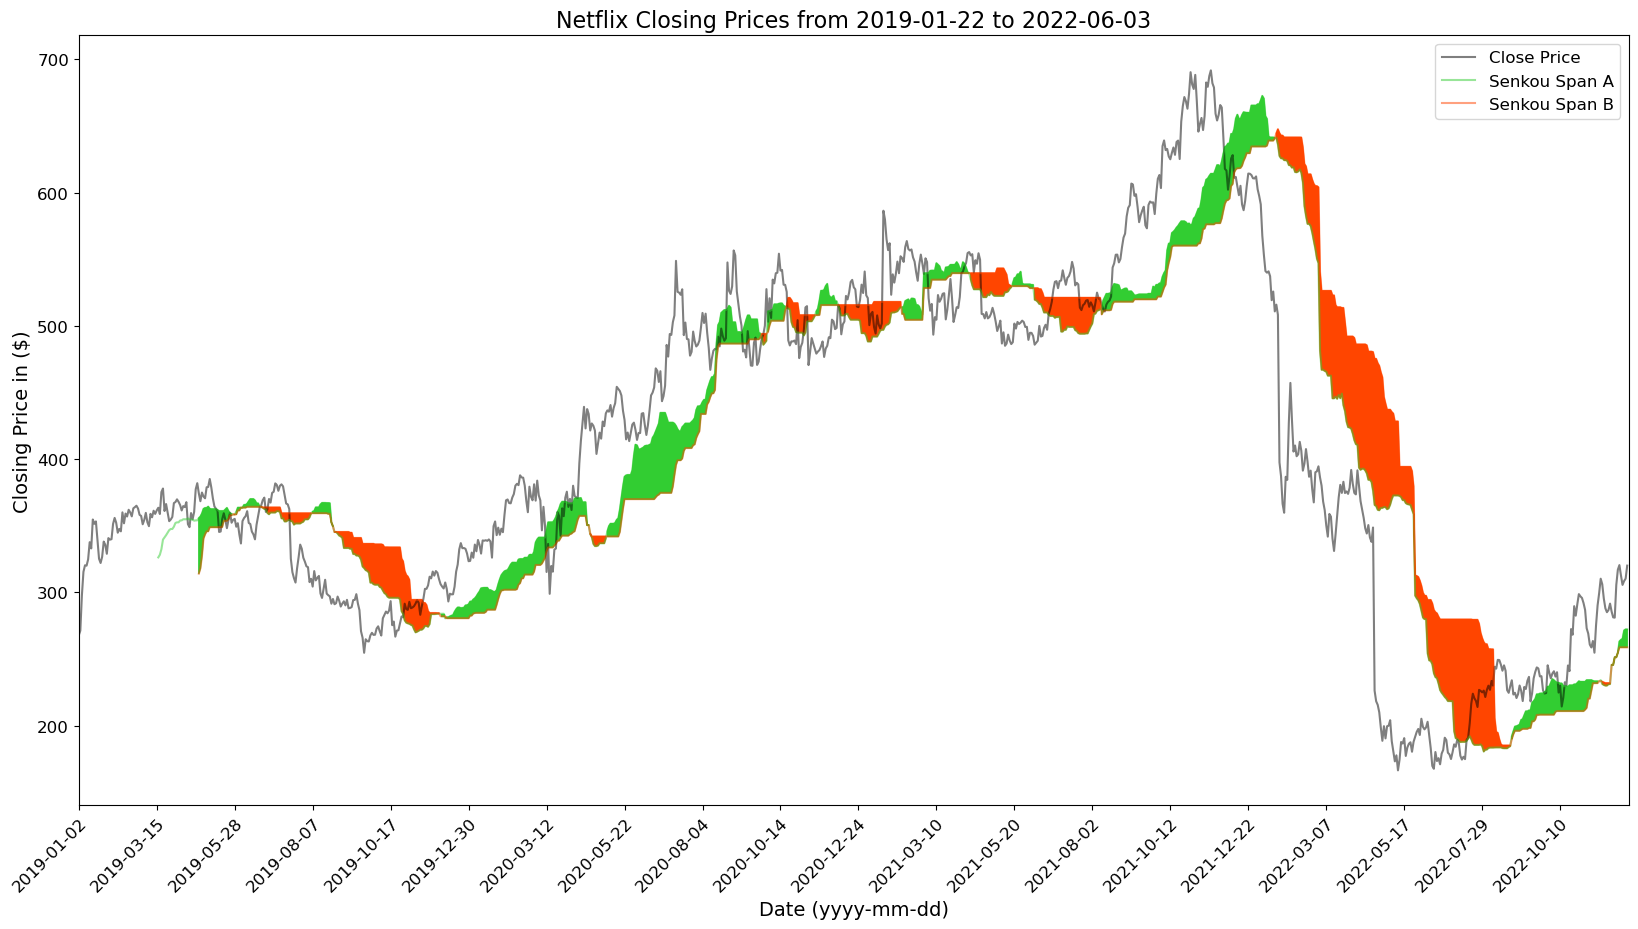

In [35]:
IchimokuCloud(stock_cases)

In [36]:
#SMA Indicator output for month/season
stock_cases_IchimokuCloud= stock_cases[stock_cases["senkou_span_a"] ==
                                       stock_cases["senkou_span_b"]][['Date','Close','New Deaths']]
stock_cases_IchimokuCloud

,Date,Close,New Deaths
104,2019-06-03,336.630005,0.0
105,2019-06-04,353.399994,0.0
162,2019-08-23,291.440002,0.0
163,2019-08-26,294.980011,0.0
326,2020-04-20,437.489990,6511.0
327,2020-04-21,433.829987,7197.0
983,2022-11-25,285.540009,1977.0
984,2022-11-28,281.170013,1155.0
985,2022-11-29,280.959991,1501.0
986,2022-11-30,305.529999,1609.0


The r-value is 0.75


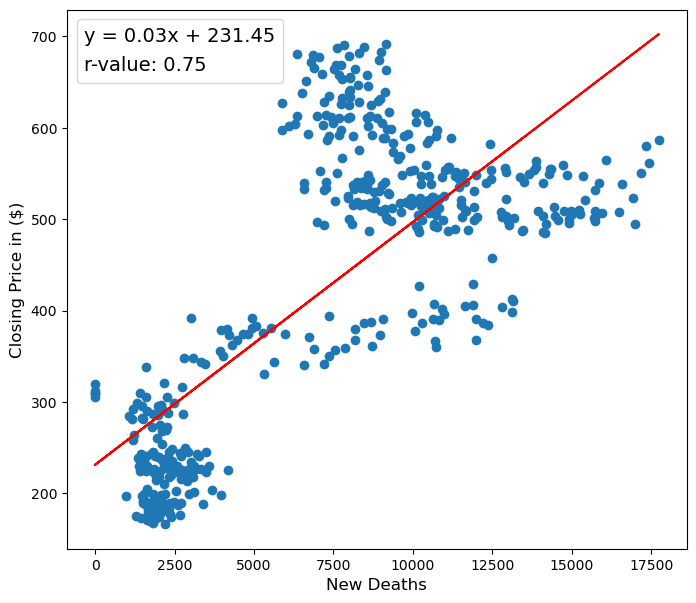

In [37]:
x_values = stock_cases.loc[(stock_cases['Date'] >= "2020-01-01") &\
                           (stock_cases['Date'] >= "2020-12-31")]['New Deaths'] 
y_values = stock_cases.loc[(stock_cases['Date'] >= "2020-01-01") &\
                           (stock_cases['Date'] >= "2020-12-31")]['Close']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r2="r-value: " + str(round(rvalue,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
handles, labels = plt.gca().get_legend_handles_labels()
patch_1 = mpatches.Patch(color='none', label=line_eq)
patch_2 = mpatches.Patch(color='none', label=r2)
handles.extend([patch_1, patch_2])
plt.legend(fontsize=14, loc='best',handlelength=0, handletextpad=0, fancybox=True,
           handles=handles)
        
plt.xlabel('New Deaths', fontsize=12)
plt.ylabel('Closing Price in ($)', fontsize=12)
        

plt.gcf().set_size_inches(8, 7)
print(f"The r-value is {round(rvalue,2)}")
plt.show()

The r-value is 0.77


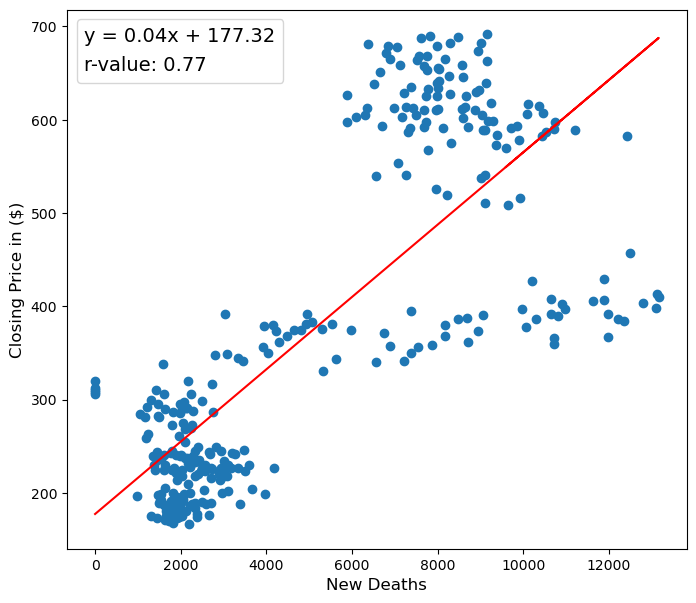

In [38]:
x_values = stock_cases.loc[(stock_cases['Date'] >= "2021-01-01") &\
                           (stock_cases['Date'] >= "2021-08-31")]['New Deaths'] 
y_values = stock_cases.loc[(stock_cases['Date'] >= "2021-01-01") &\
                           (stock_cases['Date'] >= "2021-08-31")]['Close']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r2="r-value: " + str(round(rvalue,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
handles, labels = plt.gca().get_legend_handles_labels()
patch_1 = mpatches.Patch(color='none', label=line_eq)
patch_2 = mpatches.Patch(color='none', label=r2)
handles.extend([patch_1, patch_2])
plt.legend(fontsize=14, loc='best',handlelength=0, handletextpad=0, fancybox=True,
           handles=handles)
        
plt.xlabel('New Deaths', fontsize=12)
plt.ylabel('Closing Price in ($)', fontsize=12)
        

plt.gcf().set_size_inches(8, 7)
print(f"The r-value is {round(rvalue,2)}")
plt.show()

The r-value is 0.73


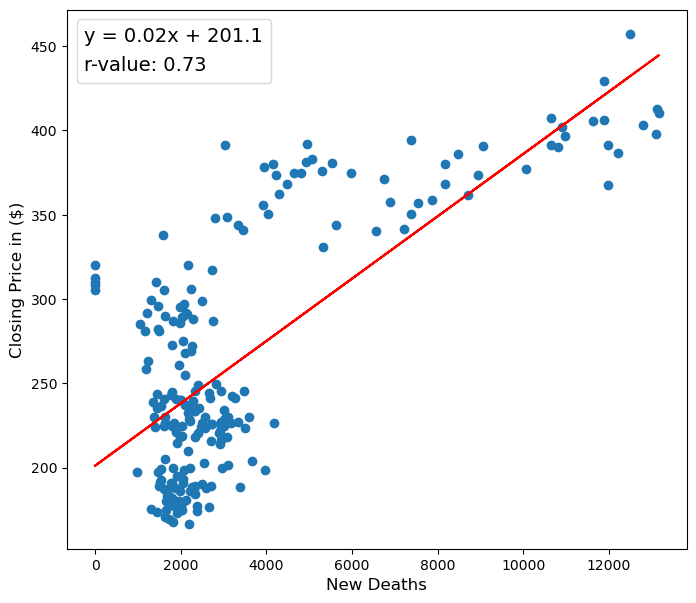

In [39]:
x_values = stock_cases.loc[(stock_cases['Date'] >= "2021-09-01") &\
                           (stock_cases['Date'] >= "2022-02-01")]['New Deaths'] 
y_values = stock_cases.loc[(stock_cases['Date'] >= "2021-09-01") &\
                           (stock_cases['Date'] >= "2022-02-01")]['Close']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r2="r-value: " + str(round(rvalue,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
handles, labels = plt.gca().get_legend_handles_labels()
patch_1 = mpatches.Patch(color='none', label=line_eq)
patch_2 = mpatches.Patch(color='none', label=r2)
handles.extend([patch_1, patch_2])
plt.legend(fontsize=14, loc='best',handlelength=0, handletextpad=0, fancybox=True,
           handles=handles)
        
plt.xlabel('New Deaths', fontsize=12)
plt.ylabel('Closing Price in ($)', fontsize=12)
        

plt.gcf().set_size_inches(8, 7)
print(f"The r-value is {round(rvalue,2)}")
plt.show()

In [40]:
stock_cases

,Date,Open,High,Low,Close,Adj Close,Volume,Entity,Code,New Cases,...,SMA90,Signal,Position,Buy,Sell,tenkan_sen,kijun_sen,senkou_span_a,senkou_span_b,chikou_span
0,2019-01-02,259.279999,269.750000,256.579987,267.660004,267.660004,11679500,0,0,0.0,...,0.000000,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,351.339996
1,2019-01-03,270.200012,275.790009,264.429993,271.200012,271.200012,14969600,0,0,0.0,...,0.000000,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,355.809998
2,2019-01-04,281.880005,297.799988,278.540009,297.570007,297.570007,19330100,0,0,0.0,...,0.000000,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,352.190002
3,2019-01-07,302.100006,316.799988,301.649994,315.339996,315.339996,18620100,0,0,0.0,...,0.000000,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,344.709991
4,2019-01-08,319.980011,320.589996,308.010010,320.269989,320.269989,15359200,0,0,0.0,...,0.000000,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,347.570007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,2022-12-05,316.459991,322.769989,310.920013,312.589996,312.589996,8423000,0,0,0.0,...,252.634334,1,0.0,0.0,0.0,299.354996,287.429993,264.347500,258.68,NaN
990,2022-12-06,311.000000,313.220001,303.130005,305.559998,305.559998,7195400,0,0,0.0,...,253.530556,1,0.0,0.0,0.0,299.354996,287.429993,265.180000,258.68,NaN
991,2022-12-07,306.500000,309.609985,302.100006,308.420013,308.420013,7821600,0,0,0.0,...,254.444001,1,0.0,0.0,0.0,299.354996,287.429993,271.412502,258.68,NaN
992,2022-12-08,309.109985,312.380005,304.809998,310.260010,310.260010,7205300,0,0,0.0,...,255.431112,1,0.0,0.0,0.0,299.354996,287.429993,272.167500,258.68,NaN


The r-value is -0.27


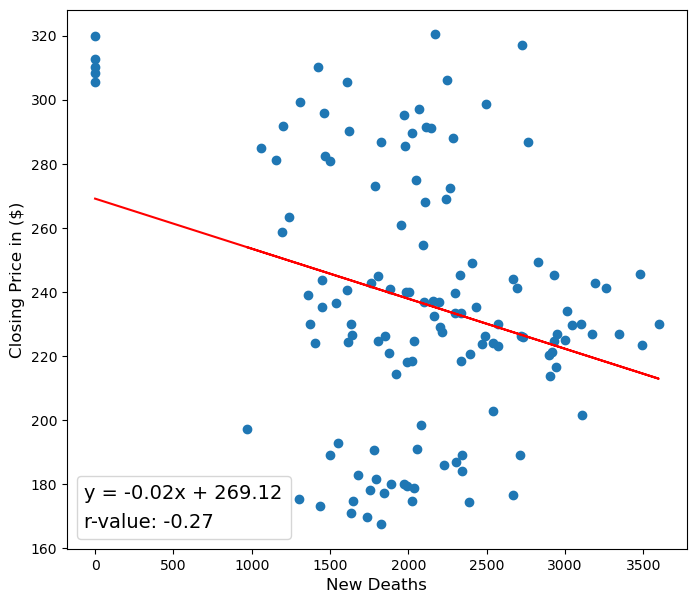

In [41]:
x_values = stock_cases.loc[(stock_cases['Date'] >= "2020-01-01") &\
                           (stock_cases['Date'] >= "2022-06-06")]['New Deaths'] 
y_values = stock_cases.loc[(stock_cases['Date'] >= "2020-01-01") &\
                           (stock_cases['Date'] >= "2022-06-06")]['Close']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r2="r-value: " + str(round(rvalue,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
handles, labels = plt.gca().get_legend_handles_labels()
patch_1 = mpatches.Patch(color='none', label=line_eq)
patch_2 = mpatches.Patch(color='none', label=r2)
handles.extend([patch_1, patch_2])
plt.legend(fontsize=14, loc='best',handlelength=0, handletextpad=0, fancybox=True,
           handles=handles)
        
plt.xlabel('New Deaths', fontsize=12)
plt.ylabel('Closing Price in ($)', fontsize=12)
        

plt.gcf().set_size_inches(8, 7)
print(f"The r-value is {round(rvalue,2)}")
plt.show()

In [42]:
# Average directional index (ADX)
def ADX(df, period):
    """
    Computes the ADX indicator.
    """
    alpha = 1/period

    # TR
    df['H-L'] = df['High'] - df['Low']
    df['H-C'] = np.abs(df['High'] - df['Close'].shift(1))
    df['L-C'] = np.abs(df['Low'] - df['Close'].shift(1))
    df['TR'] = df[['H-L', 'H-C', 'L-C']].max(axis=1)
    del df['H-L'], df['H-C'], df['L-C']

    # ATR
    df['ATR'] = df['TR'].ewm(alpha=alpha, adjust=False).mean()

    # +-DX
    df['H-pH'] = df['High'] - df['High'].shift(1)
    df['pL-L'] = df['Low'].shift(1) - df['Low']
    df['+DX'] = np.where(
        (df['H-pH'] > df['pL-L']) & (df['H-pH']>0),
        df['H-pH'],
        0.0
    )
    df['-DX'] = np.where(
        (df['H-pH'] < df['pL-L']) & (df['pL-L']>0),
        df['pL-L'],
        0.0
    )
    del df['H-pH'], df['pL-L']

    # +- DMI
    df['S+DM'] = df['+DX'].ewm(alpha=alpha, adjust=False).mean()
    df['S-DM'] = df['-DX'].ewm(alpha=alpha, adjust=False).mean()
    df['+DMI'] = (df['S+DM']/df['ATR'])*100
    df['-DMI'] = (df['S-DM']/df['ATR'])*100
    del df['S+DM'], df['S-DM']

    # ADX
    df['DX'] = (np.abs(df['+DMI'] - df['-DMI'])/(df['+DMI'] + df['-DMI']))*100
    df['ADX'+str(period)] = df['DX'].ewm(alpha=alpha, adjust=False).mean()
    del df['DX'], df['ATR'], df['TR'], df['-DX'], df['+DX'], df['+DMI'], df['-DMI']

    return df

https://www.investopedia.com/articles/trading/07/adx-trend-indicator.asp

In [43]:
ADX(stock_cases,30)
ADX(stock_cases,14)

,Date,Open,High,Low,Close,Adj Close,Volume,Entity,Code,New Cases,...,Position,Buy,Sell,tenkan_sen,kijun_sen,senkou_span_a,senkou_span_b,chikou_span,ADX30,ADX14
0,2019-01-02,259.279999,269.750000,256.579987,267.660004,267.660004,11679500,0,0,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,351.339996,NaN,NaN
1,2019-01-03,270.200012,275.790009,264.429993,271.200012,271.200012,14969600,0,0,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,355.809998,100.000000,100.000000
2,2019-01-04,281.880005,297.799988,278.540009,297.570007,297.570007,19330100,0,0,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,352.190002,100.000000,100.000000
3,2019-01-07,302.100006,316.799988,301.649994,315.339996,315.339996,18620100,0,0,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,344.709991,100.000000,100.000000
4,2019-01-08,319.980011,320.589996,308.010010,320.269989,320.269989,15359200,0,0,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,347.570007,100.000000,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,2022-12-05,316.459991,322.769989,310.920013,312.589996,312.589996,8423000,0,0,0.0,...,0.0,0.0,0.0,299.354996,287.429993,264.347500,258.68,NaN,16.789190,22.395480
990,2022-12-06,311.000000,313.220001,303.130005,305.559998,305.559998,7195400,0,0,0.0,...,0.0,0.0,0.0,299.354996,287.429993,265.180000,258.68,NaN,16.948129,22.543890
991,2022-12-07,306.500000,309.609985,302.100006,308.420013,308.420013,7821600,0,0,0.0,...,0.0,0.0,0.0,299.354996,287.429993,271.412502,258.68,NaN,17.079609,22.580446
992,2022-12-08,309.109985,312.380005,304.809998,310.260010,310.260010,7205300,0,0,0.0,...,0.0,0.0,0.0,299.354996,287.429993,272.167500,258.68,NaN,17.246227,22.789879


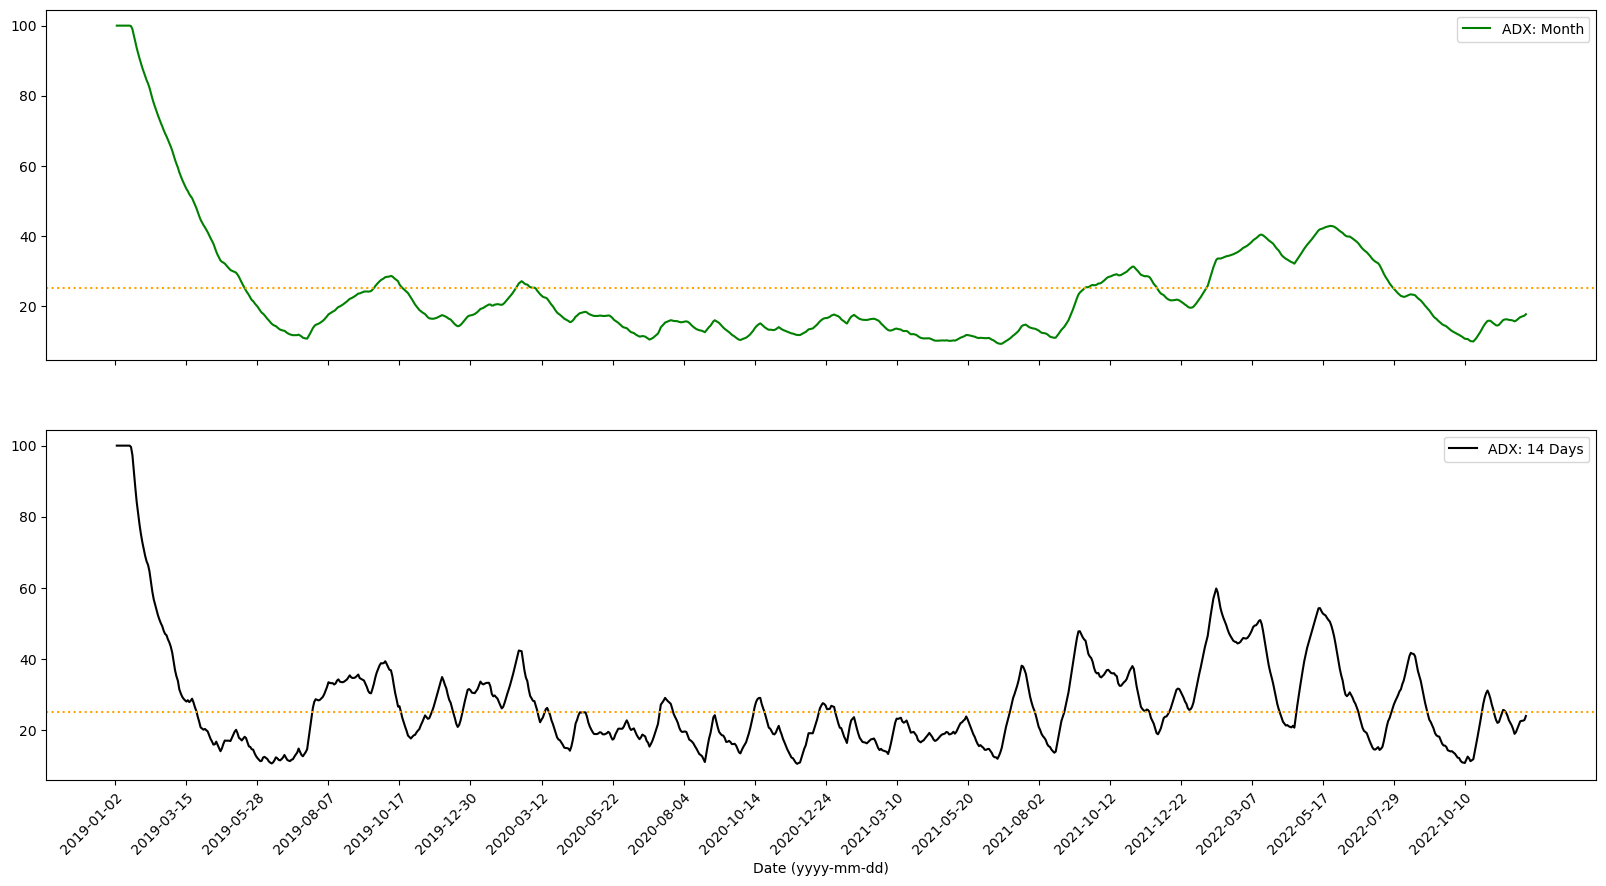

In [44]:
fig,(ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(20,10))
# If plt.figure does not change the size, try placing it before plt.plot!

ax1.plot(stock_cases['Date'], stock_cases['ADX30'], color = 'green', label='ADX: Month')
# plt.plot(final_stock_cases['Date'], final_stock_cases['ADX7'], color = 'red', label='Week')
ax2.plot(stock_cases['Date'], stock_cases['ADX14'], color = 'k', label='ADX: 14 Days')
plt.xticks(np.arange(0, len(stock_cases['Date']), 50), rotation = 45, rotation_mode = 'anchor', ha = 'right')
# plt.xlim(0, 598)
ax1.axhline(25, color='orange', linestyle='dotted')
ax2.axhline(25, color='orange', linestyle='dotted')
# ax1.axhline(31, color='orange', linestyle='dotted')
plt.xlabel('Date (yyyy-mm-dd)')
# plt.title('Netflix Closing Prices from 2019-01-22 to 2022-06-03')
ax1.legend()
ax2.legend()
plt.show()

In [45]:
stock_cases_ADX= stock_cases[(stock_cases["ADX14"] <= 25) &\
                             (stock_cases["Date"] > '2020-01-22')&\
                            (stock_cases["Date"] < '2022-06-01')]\
                            [['Date','ADX14','Close','New Deaths']]
stock_cases_ADX

,Date,ADX14,Close,New Deaths
298,2020-03-10,23.604390,364.130005,275.0
299,2020-03-11,22.138178,349.920013,352.0
300,2020-03-12,22.884714,315.250000,321.0
301,2020-03-13,23.520260,336.299988,503.0
302,2020-03-16,24.626267,298.839996,715.0
...,...,...,...,...
827,2022-04-13,20.822558,350.429993,4030.0
828,2022-04-14,20.712616,341.130005,3464.0
829,2022-04-18,21.150324,337.859985,1587.0
830,2022-04-19,20.629302,348.609985,3077.0


The r-value is 0.56


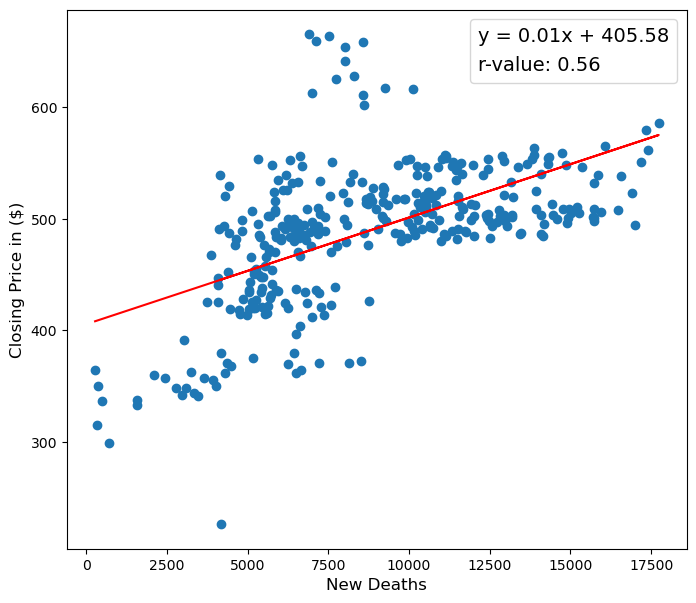

In [46]:
x_values = stock_cases_ADX['New Deaths']
y_values = stock_cases_ADX['Close']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r2="r-value: " + str(round(rvalue,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
handles, labels = plt.gca().get_legend_handles_labels()
patch_1 = mpatches.Patch(color='none', label=line_eq)
patch_2 = mpatches.Patch(color='none', label=r2)
handles.extend([patch_1, patch_2])
plt.legend(fontsize=14, loc='best',handlelength=0, handletextpad=0, fancybox=True,
           handles=handles)
        
plt.xlabel('New Deaths', fontsize=12)
plt.ylabel('Closing Price in ($)', fontsize=12)
        

plt.gcf().set_size_inches(8, 7)
print(f"The r-value is {round(rvalue,2)}")
plt.show()

In [47]:
stock_cases_ADX= stock_cases[(stock_cases["ADX30"] <= 25) &\
                             (stock_cases["Date"] > '2020-01-22')&\
                            (stock_cases["Date"] < '2022-06-01')]\
                            [['Date','ADX14','Close','New Deaths']]
stock_cases_ADX

,Date,ADX14,Close,New Deaths
266,2020-01-23,29.446561,349.600006,1.0
267,2020-01-24,29.686679,353.160004,8.0
268,2020-01-27,29.203007,342.880005,26.0
269,2020-01-28,28.798953,348.519989,49.0
270,2020-01-29,27.811314,343.160004,2.0
...,...,...,...,...
763,2022-01-11,35.676961,540.840027,9106.0
764,2022-01-12,37.423201,537.219971,9023.0
765,2022-01-13,39.394368,519.200012,8229.0
766,2022-01-14,41.369052,525.690002,7967.0


The r-value is 0.58


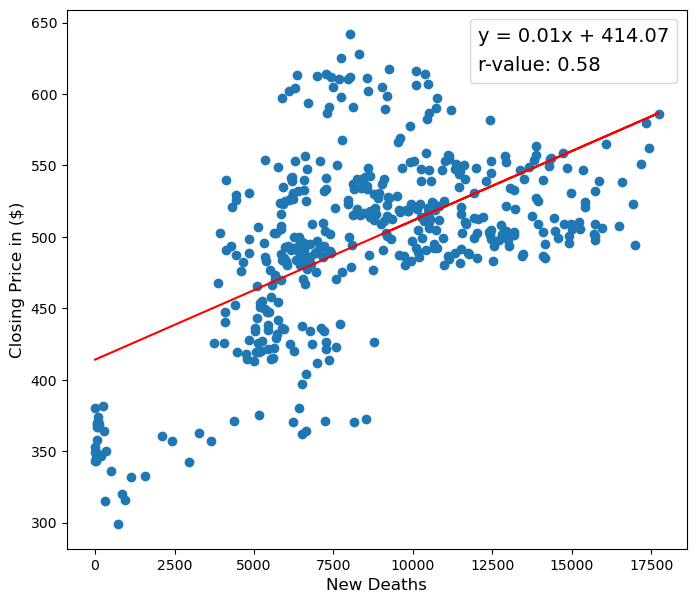

In [48]:
x_values = stock_cases_ADX['New Deaths']
y_values = stock_cases_ADX['Close']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r2="r-value: " + str(round(rvalue,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
handles, labels = plt.gca().get_legend_handles_labels()
patch_1 = mpatches.Patch(color='none', label=line_eq)
patch_2 = mpatches.Patch(color='none', label=r2)
handles.extend([patch_1, patch_2])
plt.legend(fontsize=14, loc='best',handlelength=0, handletextpad=0, fancybox=True,
           handles=handles)
        
plt.xlabel('New Deaths', fontsize=12)
plt.ylabel('Closing Price in ($)', fontsize=12)
        

plt.gcf().set_size_inches(8, 7)
print(f"The r-value is {round(rvalue,2)}")
plt.show()

In [49]:
stock_cases_ADX= stock_cases[(stock_cases["ADX14"] <= 25) &\
                                         (stock_cases["ADX30"] <= 25) &\
                            (stock_cases["Date"] > '2020-01-22')&\
                            (stock_cases["Date"] < '2022-06-01')]\
                            [['Date','ADX14','Close','New Deaths']]
stock_cases_ADX

,Date,ADX14,Close,New Deaths
298,2020-03-10,23.604390,364.130005,275.0
299,2020-03-11,22.138178,349.920013,352.0
300,2020-03-12,22.884714,315.250000,321.0
301,2020-03-13,23.520260,336.299988,503.0
302,2020-03-16,24.626267,298.839996,715.0
...,...,...,...,...
737,2021-12-03,21.917046,602.130005,8591.0
738,2021-12-06,23.307408,612.690002,6990.0
739,2021-12-07,23.687937,625.580017,7728.0
740,2021-12-08,23.774684,628.080017,8299.0


The r-value is 0.57


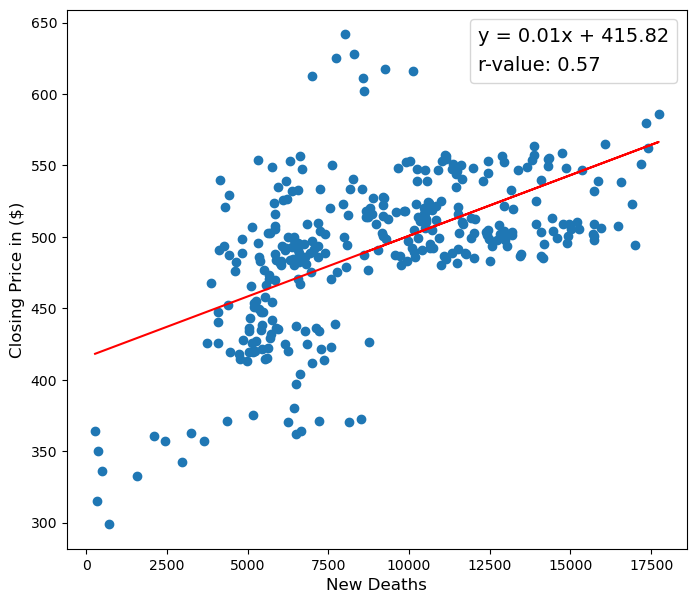

In [50]:
x_values = stock_cases_ADX['New Deaths']
y_values = stock_cases_ADX['Close']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r2="r-value: " + str(round(rvalue,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
handles, labels = plt.gca().get_legend_handles_labels()
patch_1 = mpatches.Patch(color='none', label=line_eq)
patch_2 = mpatches.Patch(color='none', label=r2)
handles.extend([patch_1, patch_2])
plt.legend(fontsize=14, loc='best',handlelength=0, handletextpad=0, fancybox=True,
           handles=handles)
        
plt.xlabel('New Deaths', fontsize=12)
plt.ylabel('Closing Price in ($)', fontsize=12)
        

plt.gcf().set_size_inches(8, 7)
print(f"The r-value is {round(rvalue,2)}")
plt.show()

In [51]:
stock_cases=stock_cases.fillna(0)
stock_cases

,Date,Open,High,Low,Close,Adj Close,Volume,Entity,Code,New Cases,...,Position,Buy,Sell,tenkan_sen,kijun_sen,senkou_span_a,senkou_span_b,chikou_span,ADX30,ADX14
0,2019-01-02,259.279999,269.750000,256.579987,267.660004,267.660004,11679500,0,0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00,351.339996,0.000000,0.000000
1,2019-01-03,270.200012,275.790009,264.429993,271.200012,271.200012,14969600,0,0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00,355.809998,100.000000,100.000000
2,2019-01-04,281.880005,297.799988,278.540009,297.570007,297.570007,19330100,0,0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00,352.190002,100.000000,100.000000
3,2019-01-07,302.100006,316.799988,301.649994,315.339996,315.339996,18620100,0,0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00,344.709991,100.000000,100.000000
4,2019-01-08,319.980011,320.589996,308.010010,320.269989,320.269989,15359200,0,0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00,347.570007,100.000000,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,2022-12-05,316.459991,322.769989,310.920013,312.589996,312.589996,8423000,0,0,0.0,...,0.0,0.0,0.0,299.354996,287.429993,264.347500,258.68,0.000000,16.789190,22.395480
990,2022-12-06,311.000000,313.220001,303.130005,305.559998,305.559998,7195400,0,0,0.0,...,0.0,0.0,0.0,299.354996,287.429993,265.180000,258.68,0.000000,16.948129,22.543890
991,2022-12-07,306.500000,309.609985,302.100006,308.420013,308.420013,7821600,0,0,0.0,...,0.0,0.0,0.0,299.354996,287.429993,271.412502,258.68,0.000000,17.079609,22.580446
992,2022-12-08,309.109985,312.380005,304.809998,310.260010,310.260010,7205300,0,0,0.0,...,0.0,0.0,0.0,299.354996,287.429993,272.167500,258.68,0.000000,17.246227,22.789879


In [52]:
# Stochastic Oscillator
stock_cases['14high'] = stock_cases['High'].rolling(14).max()
stock_cases['14low'] = stock_cases['Low'].rolling(14).min()
stock_cases['%K'] = (stock_cases['Close'] - stock_cases['14low'])*100/\
(stock_cases['14high'] - stock_cases['14low'])
stock_cases['%D'] = stock_cases['%K'].rolling(7).mean()

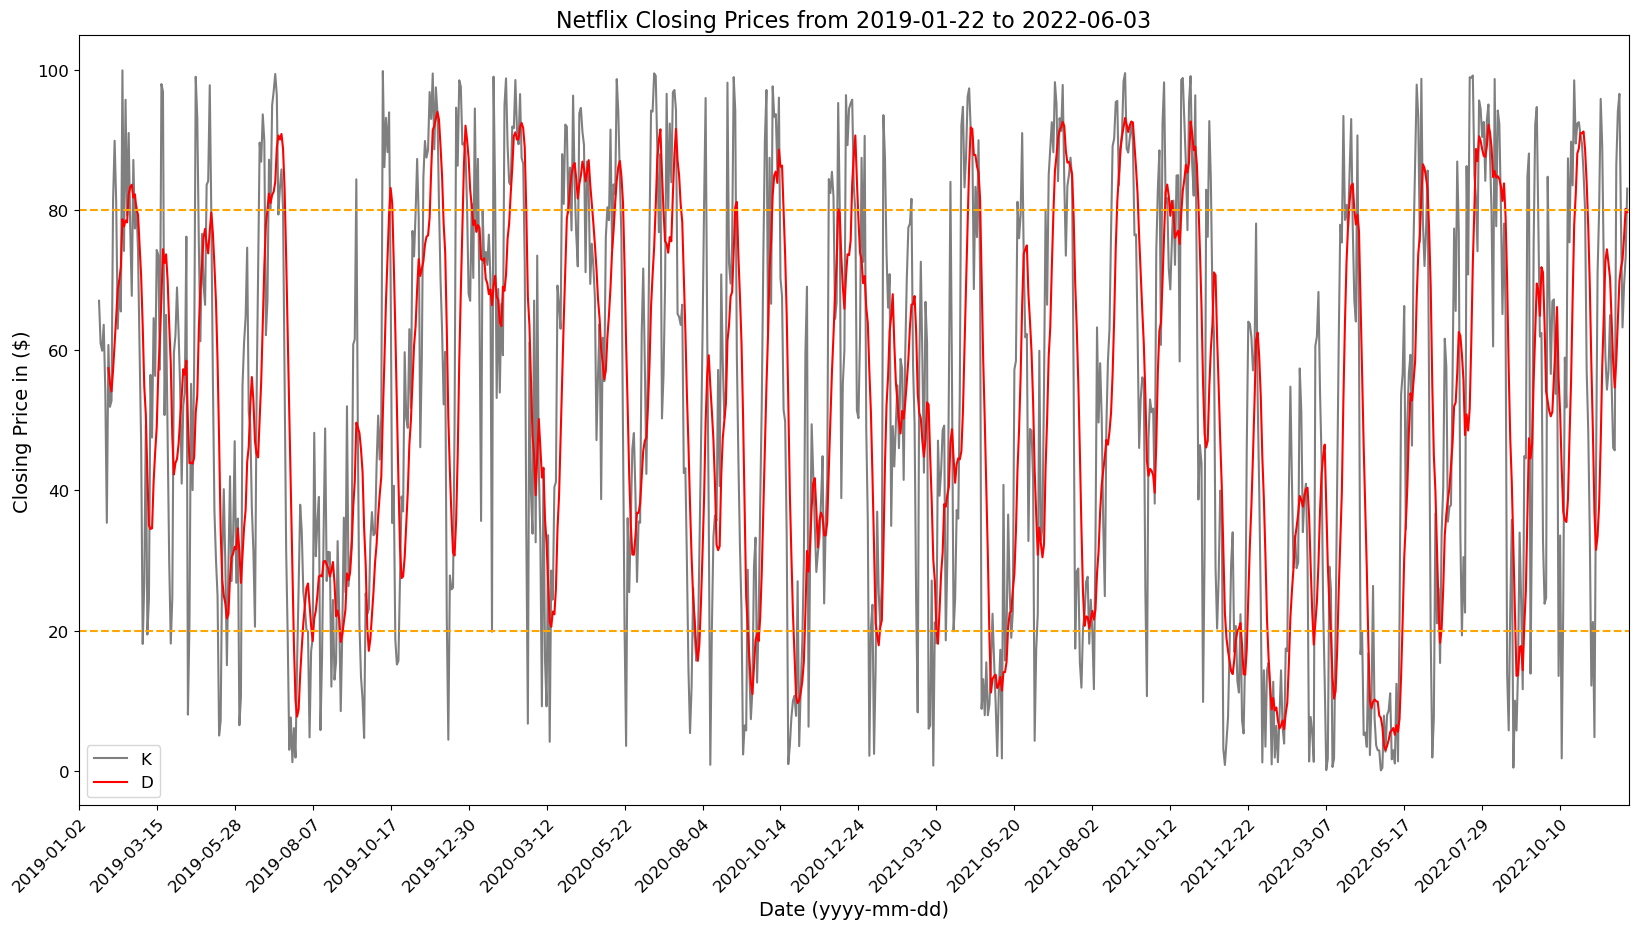

In [53]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(stock_cases['Date'], stock_cases['%K'], color = 'k', alpha=0.5, label='K')
ax.plot(stock_cases['Date'], stock_cases['%D'], color = 'red', label='D')
ax.axhline(20, linestyle='--', color="orange")
ax.axhline(80, linestyle="--", color="orange")
plt.xticks(np.arange(0, length, 50), rotation = 45, rotation_mode = 'anchor', ha = 'right', fontsize='12')
plt.yticks(fontsize='12')
plt.xlim(0, length)
plt.legend(fontsize='12')
plt.xlabel('Date (yyyy-mm-dd)', fontsize='14')
plt.ylabel('Closing Price in ($)', fontsize='14')
plt.title('Netflix Closing Prices from 2019-01-22 to 2022-06-03', fontsize='16')
plt.show()

In [54]:
stock_cases

,Date,Open,High,Low,Close,Adj Close,Volume,Entity,Code,New Cases,...,kijun_sen,senkou_span_a,senkou_span_b,chikou_span,ADX30,ADX14,14high,14low,%K,%D
0,2019-01-02,259.279999,269.750000,256.579987,267.660004,267.660004,11679500,0,0,0.0,...,0.000000,0.000000,0.00,351.339996,0.000000,0.000000,NaN,NaN,NaN,NaN
1,2019-01-03,270.200012,275.790009,264.429993,271.200012,271.200012,14969600,0,0,0.0,...,0.000000,0.000000,0.00,355.809998,100.000000,100.000000,NaN,NaN,NaN,NaN
2,2019-01-04,281.880005,297.799988,278.540009,297.570007,297.570007,19330100,0,0,0.0,...,0.000000,0.000000,0.00,352.190002,100.000000,100.000000,NaN,NaN,NaN,NaN
3,2019-01-07,302.100006,316.799988,301.649994,315.339996,315.339996,18620100,0,0,0.0,...,0.000000,0.000000,0.00,344.709991,100.000000,100.000000,NaN,NaN,NaN,NaN
4,2019-01-08,319.980011,320.589996,308.010010,320.269989,320.269989,15359200,0,0,0.0,...,0.000000,0.000000,0.00,347.570007,100.000000,100.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,2022-12-05,316.459991,322.769989,310.920013,312.589996,312.589996,8423000,0,0,0.0,...,287.429993,264.347500,258.68,0.000000,16.789190,22.395480,322.769989,275.940002,78.261807,71.750172
990,2022-12-06,311.000000,313.220001,303.130005,305.559998,305.559998,7195400,0,0,0.0,...,287.429993,265.180000,258.68,0.000000,16.948129,22.543890,322.769989,275.940002,63.250061,72.903062
991,2022-12-07,306.500000,309.609985,302.100006,308.420013,308.420013,7821600,0,0,0.0,...,287.429993,271.412502,258.68,0.000000,17.079609,22.580446,322.769989,275.940002,69.357293,76.228921
992,2022-12-08,309.109985,312.380005,304.809998,310.260010,310.260010,7205300,0,0,0.0,...,287.429993,272.167500,258.68,0.000000,17.246227,22.789879,322.769989,275.940002,73.286392,80.167375


In [55]:
stock_cases_ADX= stock_cases[(stock_cases["%K"] >= 20) &\
                             (stock_cases["%K"] <= 80) &\
                             (stock_cases["Date"] > '2020-01-22')&\
                            (stock_cases["Date"] < '2022-06-01')]\
                            [['Date','%K','Close','New Deaths']]
stock_cases_ADX

,Date,%K,Close,New Deaths
268,2020-01-27,53.186204,342.880005,26.0
269,2020-01-28,68.744780,348.519989,49.0
270,2020-01-29,53.958614,343.160004,2.0
271,2020-01-30,66.593060,347.739990,39.0
272,2020-01-31,59.282732,345.089996,42.0
...,...,...,...,...
852,2022-05-19,49.843988,183.479996,1696.0
853,2022-05-20,56.731463,186.350006,1983.0
854,2022-05-23,59.347245,187.440002,1601.0
855,2022-05-24,46.394710,180.339996,1655.0


The r-value is 0.5


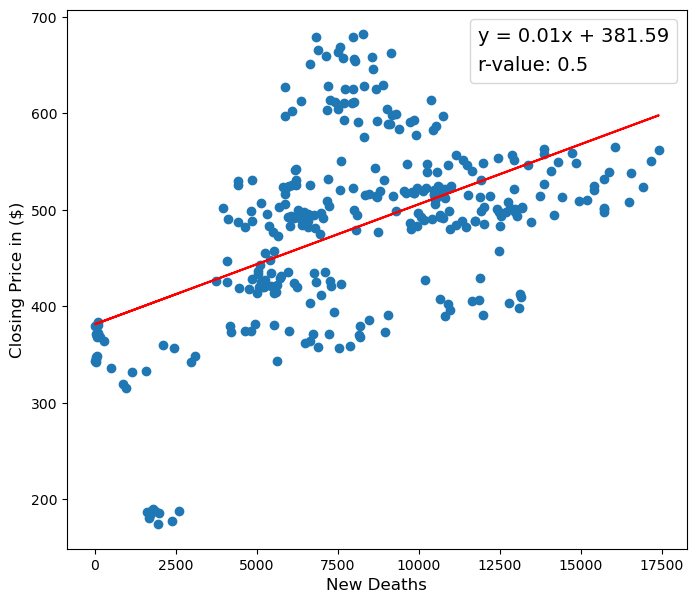

In [56]:
x_values = stock_cases_ADX['New Deaths']
y_values = stock_cases_ADX['Close']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r2="r-value: " + str(round(rvalue,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
handles, labels = plt.gca().get_legend_handles_labels()
patch_1 = mpatches.Patch(color='none', label=line_eq)
patch_2 = mpatches.Patch(color='none', label=r2)
handles.extend([patch_1, patch_2])
plt.legend(fontsize=14, loc='best',handlelength=0, handletextpad=0, fancybox=True,
           handles=handles)
        
plt.xlabel('New Deaths', fontsize=12)
plt.ylabel('Closing Price in ($)', fontsize=12)
        

plt.gcf().set_size_inches(8, 7)
print(f"The r-value is {round(rvalue,2)}")
plt.show()

In [57]:
# Define Exponential Moving Average
def EMA(df,period=7, Column='Close'):
    return df[Column].ewm(span=period, adjust=False).mean()

In [58]:
def RSIIndicator(df, period=14, Column='Close'):
    delta = df[Column].diff(1)
    df['gain'] = delta.clip(lower=0).round(2)
    df['loss'] = delta.clip(upper=0).abs().round(2)
    df['avg_gain'] = df['gain'].rolling(window=period, min_periods=period).mean()[:period+1]
    df['avg_loss'] = df['loss'].rolling(window=period, min_periods=period).mean()[:period+1]
    for i, row in enumerate(df['avg_gain'].iloc[period+1:]):
    # Average Gain 
        df['avg_gain'].iloc[i + period + 1] =\
        (df['avg_gain'].iloc[i + period] *(period - 1) + df['gain'].iloc[i + period + 1])\
        / period
    # Average Losses
    for i, row in enumerate(df['avg_loss'].iloc[period+1:]):
        df['avg_loss'].iloc[i + period + 1] =\
        (df['avg_loss'].iloc[i + period] *
         (period - 1) +
         df['loss'].iloc[i + period + 1])\
        / period
        # Calculate RS Values
    df['rs'] = df['avg_gain'] / df['avg_loss']
    # Calculate RSI
    df['rsi'] = 100 - (100 / (1.0 + df['rs']))
    return

In [59]:
RSIIndicator(stock_cases,14)
stock_cases

C:\Users\Theid\AppData\Local\Temp\ipykernel_37340\746946237.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['avg_gain'].iloc[i + period + 1] =\
C:\Users\Theid\AppData\Local\Temp\ipykernel_37340\746946237.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['avg_loss'].iloc[i + period + 1] =\


,Date,Open,High,Low,Close,Adj Close,Volume,Entity,Code,New Cases,...,14high,14low,%K,%D,gain,loss,avg_gain,avg_loss,rs,rsi
0,2019-01-02,259.279999,269.750000,256.579987,267.660004,267.660004,11679500,0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-03,270.200012,275.790009,264.429993,271.200012,271.200012,14969600,0,0,0.0,...,NaN,NaN,NaN,NaN,3.54,0.00,NaN,NaN,NaN,NaN
2,2019-01-04,281.880005,297.799988,278.540009,297.570007,297.570007,19330100,0,0,0.0,...,NaN,NaN,NaN,NaN,26.37,0.00,NaN,NaN,NaN,NaN
3,2019-01-07,302.100006,316.799988,301.649994,315.339996,315.339996,18620100,0,0,0.0,...,NaN,NaN,NaN,NaN,17.77,0.00,NaN,NaN,NaN,NaN
4,2019-01-08,319.980011,320.589996,308.010010,320.269989,320.269989,15359200,0,0,0.0,...,NaN,NaN,NaN,NaN,4.93,0.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,2022-12-05,316.459991,322.769989,310.920013,312.589996,312.589996,8423000,0,0,0.0,...,322.769989,275.940002,78.261807,71.750172,0.00,7.82,4.888179,2.991523,1.634010,62.035071
990,2022-12-06,311.000000,313.220001,303.130005,305.559998,305.559998,7195400,0,0,0.0,...,322.769989,275.940002,63.250061,72.903062,0.00,7.03,4.539023,3.279986,1.383854,58.051130
991,2022-12-07,306.500000,309.609985,302.100006,308.420013,308.420013,7821600,0,0,0.0,...,322.769989,275.940002,69.357293,76.228921,2.86,0.00,4.419093,3.045701,1.450928,59.199126
992,2022-12-08,309.109985,312.380005,304.809998,310.260010,310.260010,7205300,0,0,0.0,...,322.769989,275.940002,73.286392,80.167375,1.84,0.00,4.234872,2.828151,1.497399,59.958348


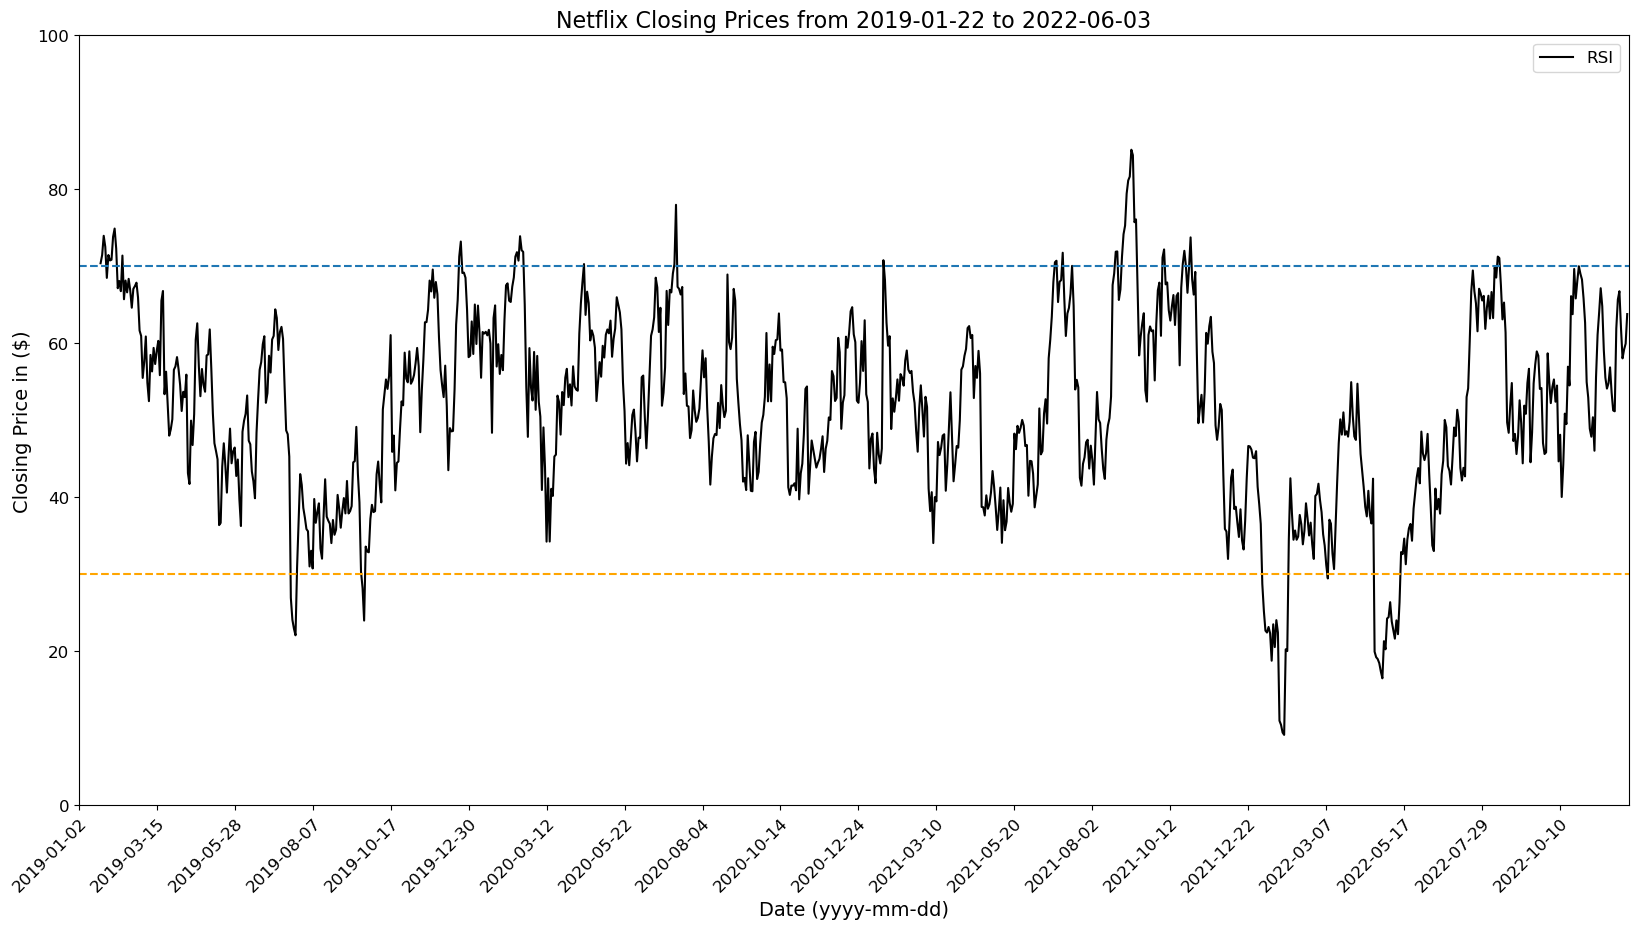

In [60]:
plt.figure(figsize=(20,10))
# If plt.figure does not change the size, try placing it before plt.plot!

plt.plot(stock_cases['Date'], stock_cases['rsi'], color = 'k', label='RSI')
plt.axhline(30, linestyle='--', color="orange")
plt.axhline(70, linestyle="--", color="tab:blue")
plt.xticks(np.arange(0, length, 50), rotation = 45, rotation_mode = 'anchor', ha = 'right', fontsize='12')
plt.yticks(fontsize='12')
plt.xlim(0, length)
plt.ylim(0, 100)
plt.legend(fontsize='12')
plt.xlabel('Date (yyyy-mm-dd)', fontsize='14')
plt.ylabel('Closing Price in ($)', fontsize='14')
plt.title('Netflix Closing Prices from 2019-01-22 to 2022-06-03', fontsize='16')
plt.show()

In [61]:
stock_cases_ADX= stock_cases[(stock_cases["%K"] >= 30) &\
                             (stock_cases["%K"] <= 70) &\
                             (stock_cases["Date"] > '2020-01-22')&\
                            (stock_cases["Date"] < '2022-06-01')]\
                            [['Date','%K','Close','New Deaths']]
stock_cases_ADX

,Date,%K,Close,New Deaths
268,2020-01-27,53.186204,342.880005,26.0
269,2020-01-28,68.744780,348.519989,49.0
270,2020-01-29,53.958614,343.160004,2.0
271,2020-01-30,66.593060,347.739990,39.0
272,2020-01-31,59.282732,345.089996,42.0
...,...,...,...,...
851,2022-05-18,34.476180,177.190002,2372.0
852,2022-05-19,49.843988,183.479996,1696.0
853,2022-05-20,56.731463,186.350006,1983.0
854,2022-05-23,59.347245,187.440002,1601.0


The r-value is 0.53


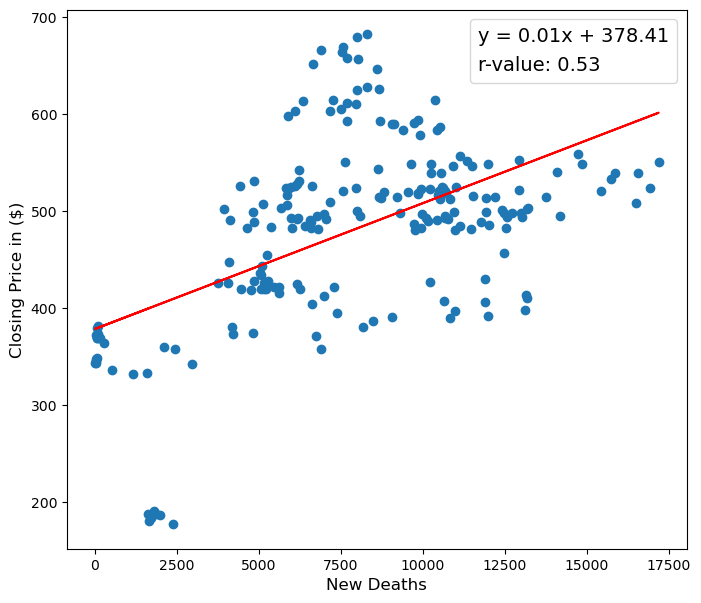

In [62]:
x_values = stock_cases_ADX['New Deaths']
y_values = stock_cases_ADX['Close']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r2="r-value: " + str(round(rvalue,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
handles, labels = plt.gca().get_legend_handles_labels()
patch_1 = mpatches.Patch(color='none', label=line_eq)
patch_2 = mpatches.Patch(color='none', label=r2)
handles.extend([patch_1, patch_2])
plt.legend(fontsize=14, loc='best',handlelength=0, handletextpad=0, fancybox=True,
           handles=handles)
        
plt.xlabel('New Deaths', fontsize=12)
plt.ylabel('Closing Price in ($)', fontsize=12)
        

plt.gcf().set_size_inches(8, 7)
print(f"The r-value is {round(rvalue,2)}")
plt.show()

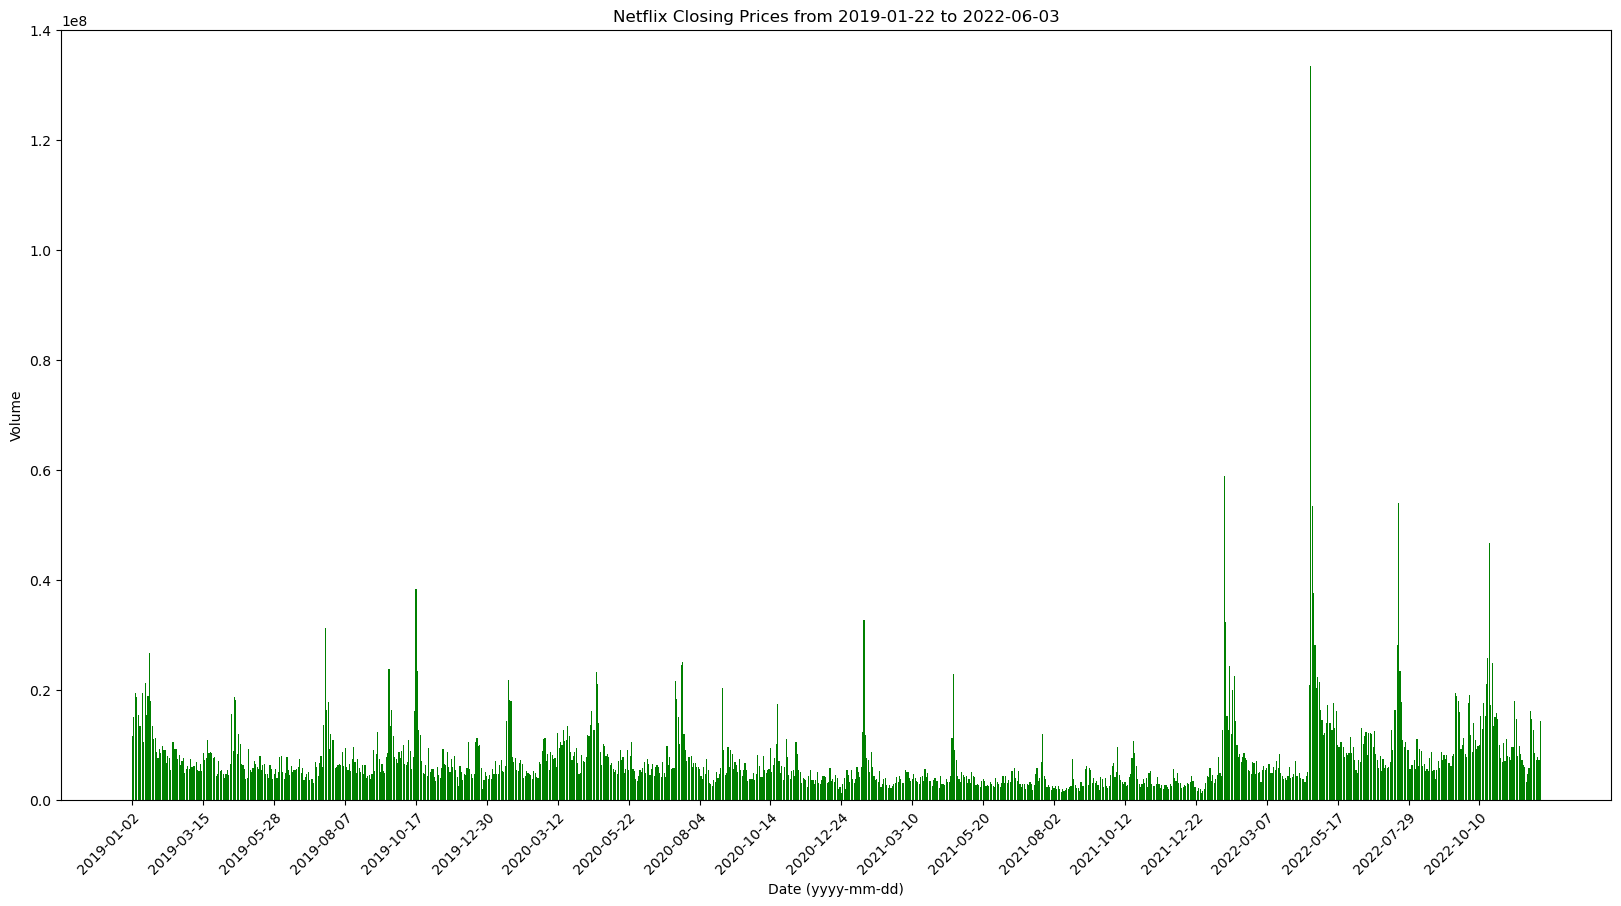

In [63]:
plt.figure(figsize=(20,10))
# If plt.figure does not change the size, try placing it before plt.plot!

plt.bar(stock_cases['Date'], stock_cases['Volume'], color = 'green')
plt.xticks(np.arange(0, len(stock_cases['Date']), 50), rotation = 45, rotation_mode = 'anchor', ha = 'right')
# plt.xlim(0, 598)
plt.xlabel('Date (yyyy-mm-dd)')
plt.ylabel('Volume')
plt.title('Netflix Closing Prices from 2019-01-22 to 2022-06-03')
plt.show()

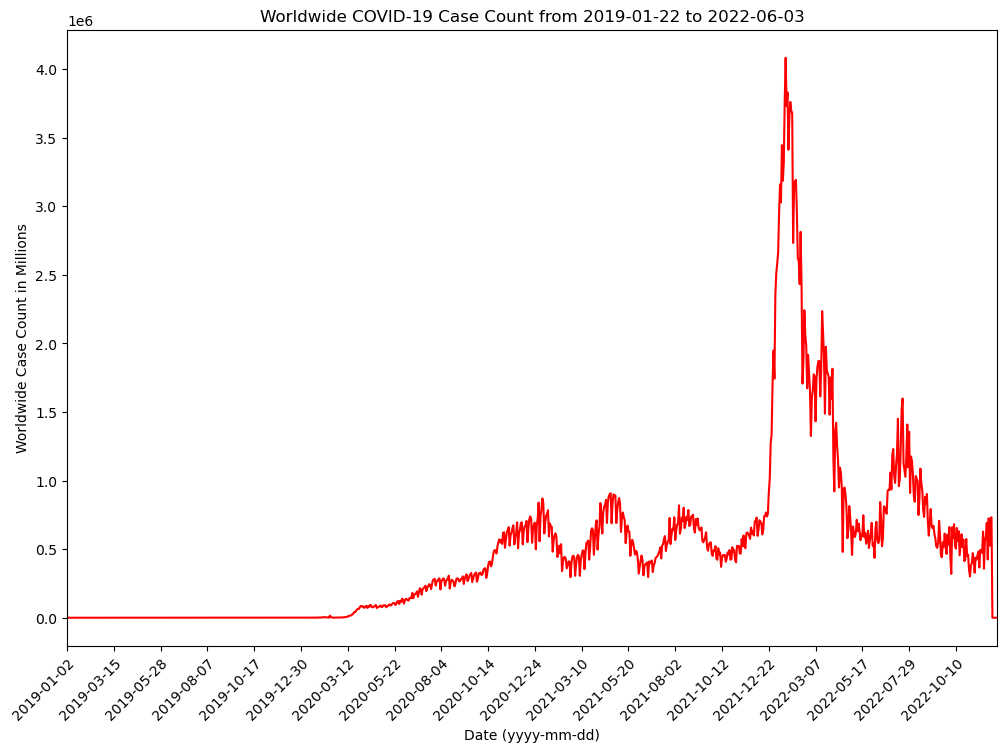

In [64]:
plt.figure(figsize=(12,8))
# If plt.figure does not change the size, try placing it before plt.plot!

plt.plot(stock_cases['Date'], stock_cases['New Cases'], color = 'red')
plt.xticks(np.arange(0, len(stock_cases['Date']), 50), rotation = 45, rotation_mode = 'anchor', ha = 'right')
plt.xlim(0, len(stock_cases['Date']))
plt.xlabel('Date (yyyy-mm-dd)')
plt.ylabel('Worldwide Case Count in Millions')
plt.title('Worldwide COVID-19 Case Count from 2019-01-22 to 2022-06-03')
plt.show()

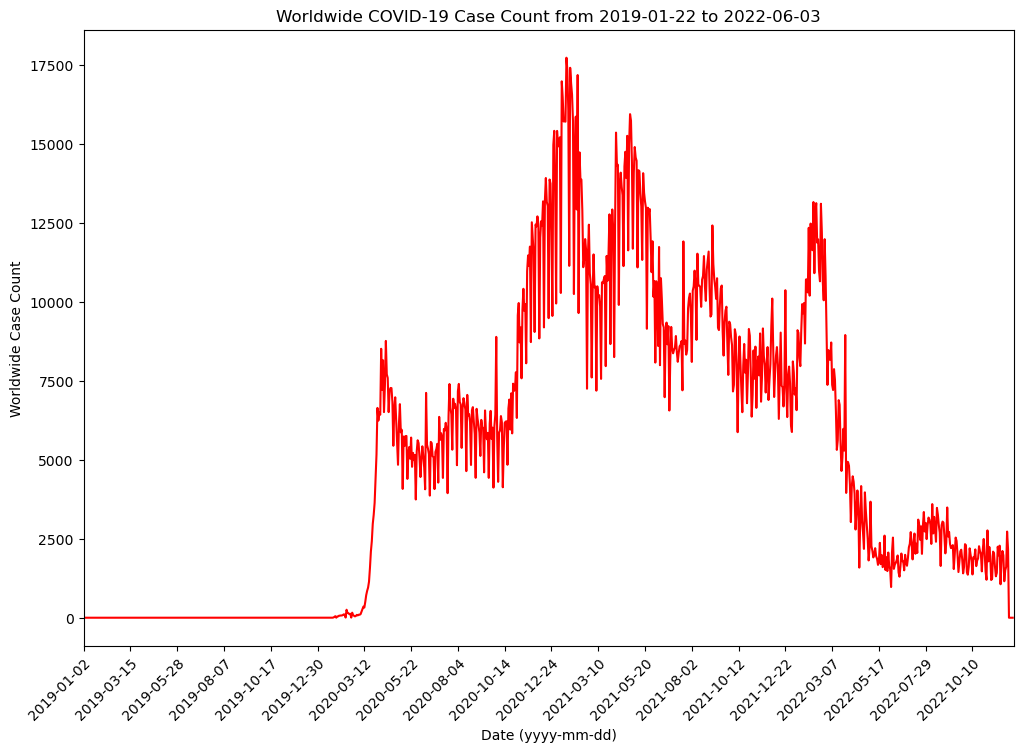

In [65]:
plt.figure(figsize=(12,8))
# If plt.figure does not change the size, try placing it before plt.plot!

plt.plot(stock_cases['Date'], stock_cases['New Deaths'], color = 'red')
plt.xticks(np.arange(0, len(stock_cases['Date']), 50), rotation = 45, rotation_mode = 'anchor', ha = 'right')
plt.xlim(0, len(stock_cases['Date']))
plt.xlabel('Date (yyyy-mm-dd)')
plt.ylabel('Worldwide Case Count')
plt.title('Worldwide COVID-19 Case Count from 2019-01-22 to 2022-06-03')
plt.show()

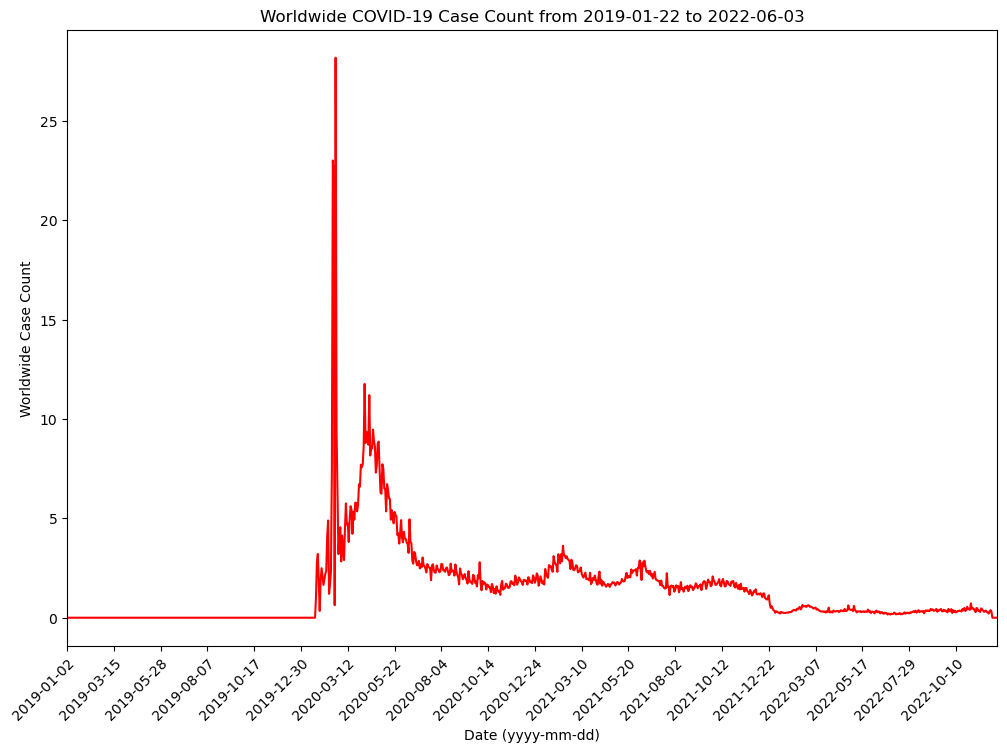

In [66]:
plt.figure(figsize=(12,8))
# If plt.figure does not change the size, try placing it before plt.plot!

plt.plot(stock_cases['Date'], stock_cases['Case Fatality'], color = 'red')
plt.xticks(np.arange(0, len(stock_cases['Date']), 50), rotation = 45, rotation_mode = 'anchor', ha = 'right')
plt.xlim(0, len(stock_cases['Date']))
plt.xlabel('Date (yyyy-mm-dd)')
plt.ylabel('Worldwide Case Count')
plt.title('Worldwide COVID-19 Case Count from 2019-01-22 to 2022-06-03')
plt.show()

In [67]:
Sti=stock_cases.loc[stock_cases['Date']>'2020-02-02'][['Date','New Deaths','rsi']].fillna(0)
Sti

,Date,New Deaths,rsi
273,2020-02-03,64.0,63.056227
274,2020-02-04,66.0,67.540083
275,2020-02-05,72.0,67.792437
276,2020-02-06,70.0,65.531331
277,2020-02-07,85.0,65.375933
...,...,...,...
989,2022-12-05,0.0,62.035071
990,2022-12-06,0.0,58.051130
991,2022-12-07,0.0,59.199126
992,2022-12-08,0.0,59.958348


The r-value is -0.05


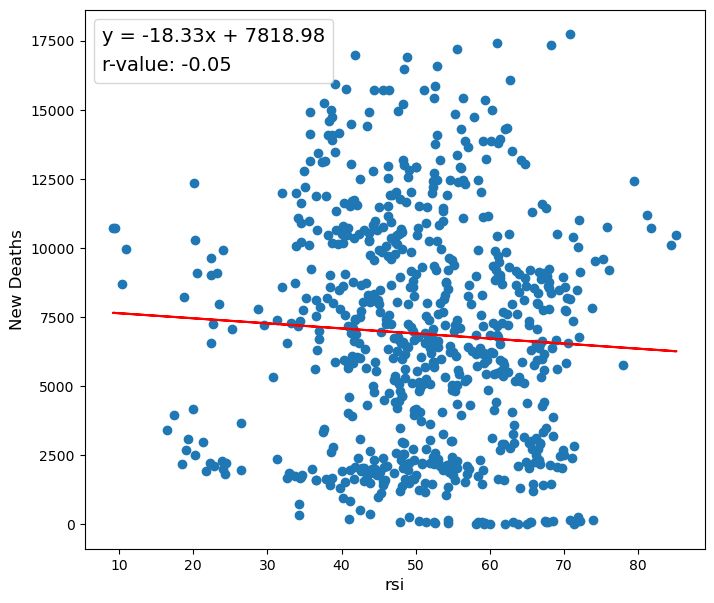

In [68]:
# def LRPlot(paramo,nameo):
#     hemisphere=[northern_hemi_df,southern_hemi_df]
#     hemispherename=["Northern Hemisphere","Southern Hemisphere"]
#     for bowl in hemisphere:
y_values = Sti['New Deaths']
x_values = Sti['rsi']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r2="r-value: " + str(round(rvalue,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
handles, labels = plt.gca().get_legend_handles_labels()
patch_1 = mpatches.Patch(color='none', label=line_eq)
patch_2 = mpatches.Patch(color='none', label=r2)
handles.extend([patch_1, patch_2])
plt.legend(fontsize=14, loc='best',handlelength=0, handletextpad=0, fancybox=True, handles=handles)
        
plt.xlabel('rsi', fontsize=12)
plt.ylabel('New Deaths', fontsize=12)
        
#         if bowl is hemisphere[0]:
#             Geo=hemispherename[0] 
#         else:
#             Geo=hemispherename[1]
            
#         plt.title("City Latitude" + " " +"vs." + " " + nameo + " " + "(" +\
#             str(time.gmtime(city_data_df["Date"][0])[0]) + "-" + str(time.gmtime(city_data_df["Date"][0])[1]) + "-" +\
#                 str(time.gmtime(city_data_df["Date"][0])[2]) + ")" + " " + "in" + " " + Geo, fontsize=14)
plt.gcf().set_size_inches(8, 7)
print(f"The r-value is {round(rvalue,2)}")
#         plt.savefig(OutputDir + paramo + " " + "LR" + " " + Geo +".png")
plt.show()


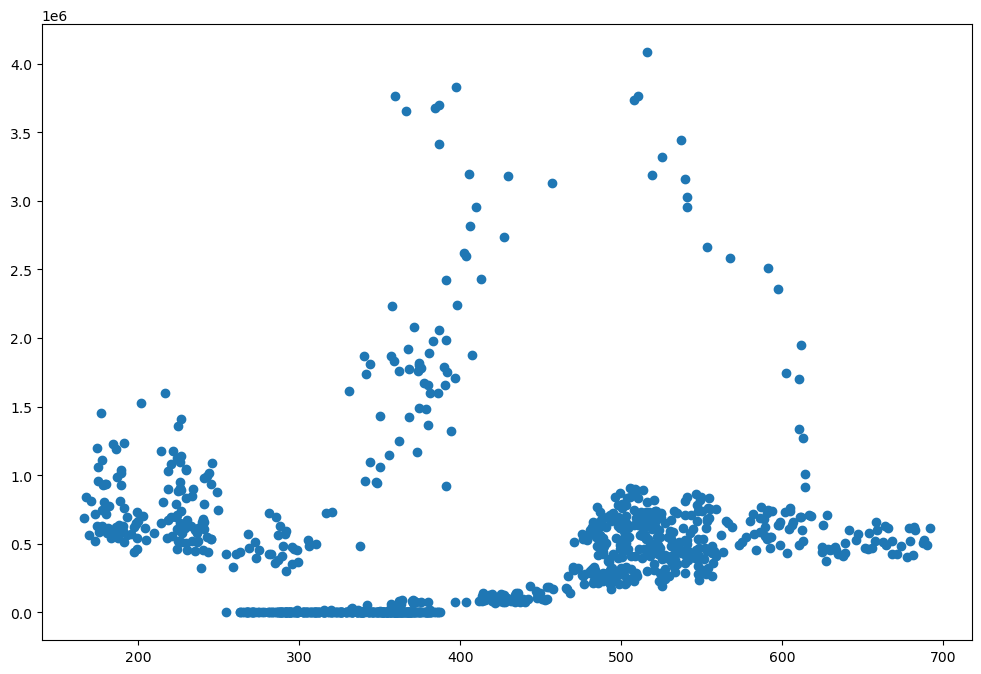

In [69]:
plt.figure(figsize=(12,8))
plt.scatter(stock_cases['Close'], stock_cases['New Cases'])
plt.show()